# Сборный Проект — 2. HR-аналитика

### Описание проекта

Проект направлен на применение методов машинного обучения для анализа данных о сотрудниках компании «Работа с заботой». Основная цель проекта — предсказать уровень удовлетворённости сотрудников работой на основе различных характеристик и, в дальнейшем, предсказать вероятность увольнения сотрудников. Это позволит HR-аналитикам принимать более обоснованные решения для оптимизации управления персоналом, что в свою очередь снизит риски, связанные с оттоком ценных работников.

### Описание задач

1. **Задача 1: Предсказание уровня удовлетворённости сотрудника**
   В этой задаче требуется построить модель, которая сможет предсказать уровень удовлетворённости сотрудника (целевой признак) на основе предоставленных характеристик. Уровень удовлетворённости является важным индикатором, влияющим на текучесть кадров, поэтому точные прогнозы могут помочь в предотвращении увольнений.

2. **Задача 2: Предсказание увольнения сотрудника из компании**
   Эта задача заключается в построении модели, которая будет предсказывать вероятность увольнения сотрудника (целевой признак) на основе тех же характеристик, что и в первой задаче. Предсказание увольнений поможет HR-аналитикам вовремя реагировать на потенциальные проблемы и принимать меры по удержанию сотрудников.

### Описание данных

*Данные для Задачи 1:*
- **train_job_satisfaction_rate.csv** — тренировочная выборка с характеристиками сотрудников и целевым признаком уровня удовлетворённости.
- **test_features.csv** — входные признаки тестовой выборки, используемые для предсказания уровня удовлетворённости.
- **test_target_job_satisfaction_rate.csv** — целевой признак тестовой выборки для проверки качества предсказаний.

*Данные для Задачи 2:*
- **train_quit.csv** — тренировочная выборка с характеристиками сотрудников и целевым признаком увольнения.
- **test_features.csv** — входные признаки тестовой выборки, те же, что и в первой задаче.
- **test_target_quit.csv** — целевой признак тестовой выборки для проверки качества предсказаний об увольнении.

### Характеристики для Задачи 1: Предсказание уровня удовлетворённости сотрудника

1. **id** — уникальный идентификатор сотрудника.
2. **dept** — отдел, в котором работает сотрудник (категориальный признак).
3. **level** — уровень занимаемой должности (категориальный признак).
4. **workload** — уровень загруженности сотрудника (числовой признак).
5. **employment_years** — длительность работы в компании в годах (числовой признак).
6. **last_year_promo** — было ли повышение за последний год (категориальный признак: да/нет).
7. **last_year_violations** — нарушал ли сотрудник трудовой договор за последний год (категориальный признак: да/нет).
8. **supervisor_evaluation** — оценка качества работы сотрудника, которую дал руководитель (числовой признак, шкала от 1 до 10).
9. **salary** — ежемесячная зарплата сотрудника (числовой признак).
10. **job_satisfaction_rate** — уровень удовлетворённости сотрудника работой в компании (целевой признак, числовой от 0 до 1).

### Характеристики для Задачи 2: Предсказание увольнения сотрудника из компании

1. **id** — уникальный идентификатор сотрудника.
2. **dept** — отдел, в котором работает сотрудник (категориальный признак).
3. **level** — уровень занимаемой должности (категориальный признак).
4. **workload** — уровень загруженности сотрудника (числовой признак).
5. **employment_years** — длительность работы в компании в годах (числовой признак).
6. **last_year_promo** — было ли повышение за последний год (категориальный признак: да/нет).
7. **last_year_violations** — нарушал ли сотрудник трудовой договор за последний год (категориальный признак: да/нет).
8. **supervisor_evaluation** — оценка качества работы сотрудника, которую дал руководитель (числовой признак, шкала от 1 до 10).
9. **salary** — ежемесячная зарплата сотрудника (числовой признак).
10. **quit** — целевой признак, указывающий на увольнение сотрудника (категориальный признак: да/нет).

### Общие цели проекта

1. Разработать модели, способные предсказать уровень удовлетворённости сотрудников и вероятность их увольнения на основе предоставленных характеристик.
2. Исследовать влияние различных факторов на уровень удовлетворённости и вероятность увольнения.
3. Создать пайплайны для предобработки данных и подготовки признаков, чтобы обеспечить воспроизводимость и эффективность разработки моделей.
4. Оценить качество моделей с использованием соответствующих метрик (SMAPE для первой задачи и ROC-AUC для второй задачи) и выбрать лучшие модели для применения в бизнесе.
5. Предложить рекомендации для HR-аналитиков по оптимизации управления персоналом на основе полученных результатов.

## Импорт необходимых библиотек

In [1]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.7.1


In [2]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, make_scorer
import phik
import shap

RANDOM_STATE=42
TEST_SIZE=0.25

# Задача 1: Предсказание уровня удовлетворённости сотрудника

## Изучение общей информации о полученном датафрейме

### Загрузка данных

In [3]:
try:
    train_job = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    X_test_job = pd.read_csv('/datasets/test_features.csv')
    y_test_job = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
except:
    train_job = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
    X_test_job = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    y_test_job = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')

Данные загружены успешно, все библиотеки импортированы.

In [4]:
train = train_job
X_test = X_test_job
y_test = y_test_job

### Изучение данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

id  employment_years  supervisor_evaluation        salary  \
count    4000.000000       4000.000000            4000.000000   4000.000000   
mean   544957.621000          3.718500               3.476500  33926.700000   
std    257883.104622          2.542513               1.008812  14900.703838   
min    100954.000000          1.000000               1.000000  12000.000000   
25%    322836.750000          2.000000               3.000000  22800.000000   
50%    534082.500000          3.000000               4.000000  30000.000000   
75%    771446.000000          6.000000               4.000000  43200.000000   
max    999521.000000         10.000000               5.000000  98400.000000   

       job_satisfaction_rate  
count            4000.000000  
mean                0.533995  
std                 0.225327  
min                 0.030000  
25%                 0.360000  
50%                 0.560000  
75%                 0.710000  
max                 1.000000

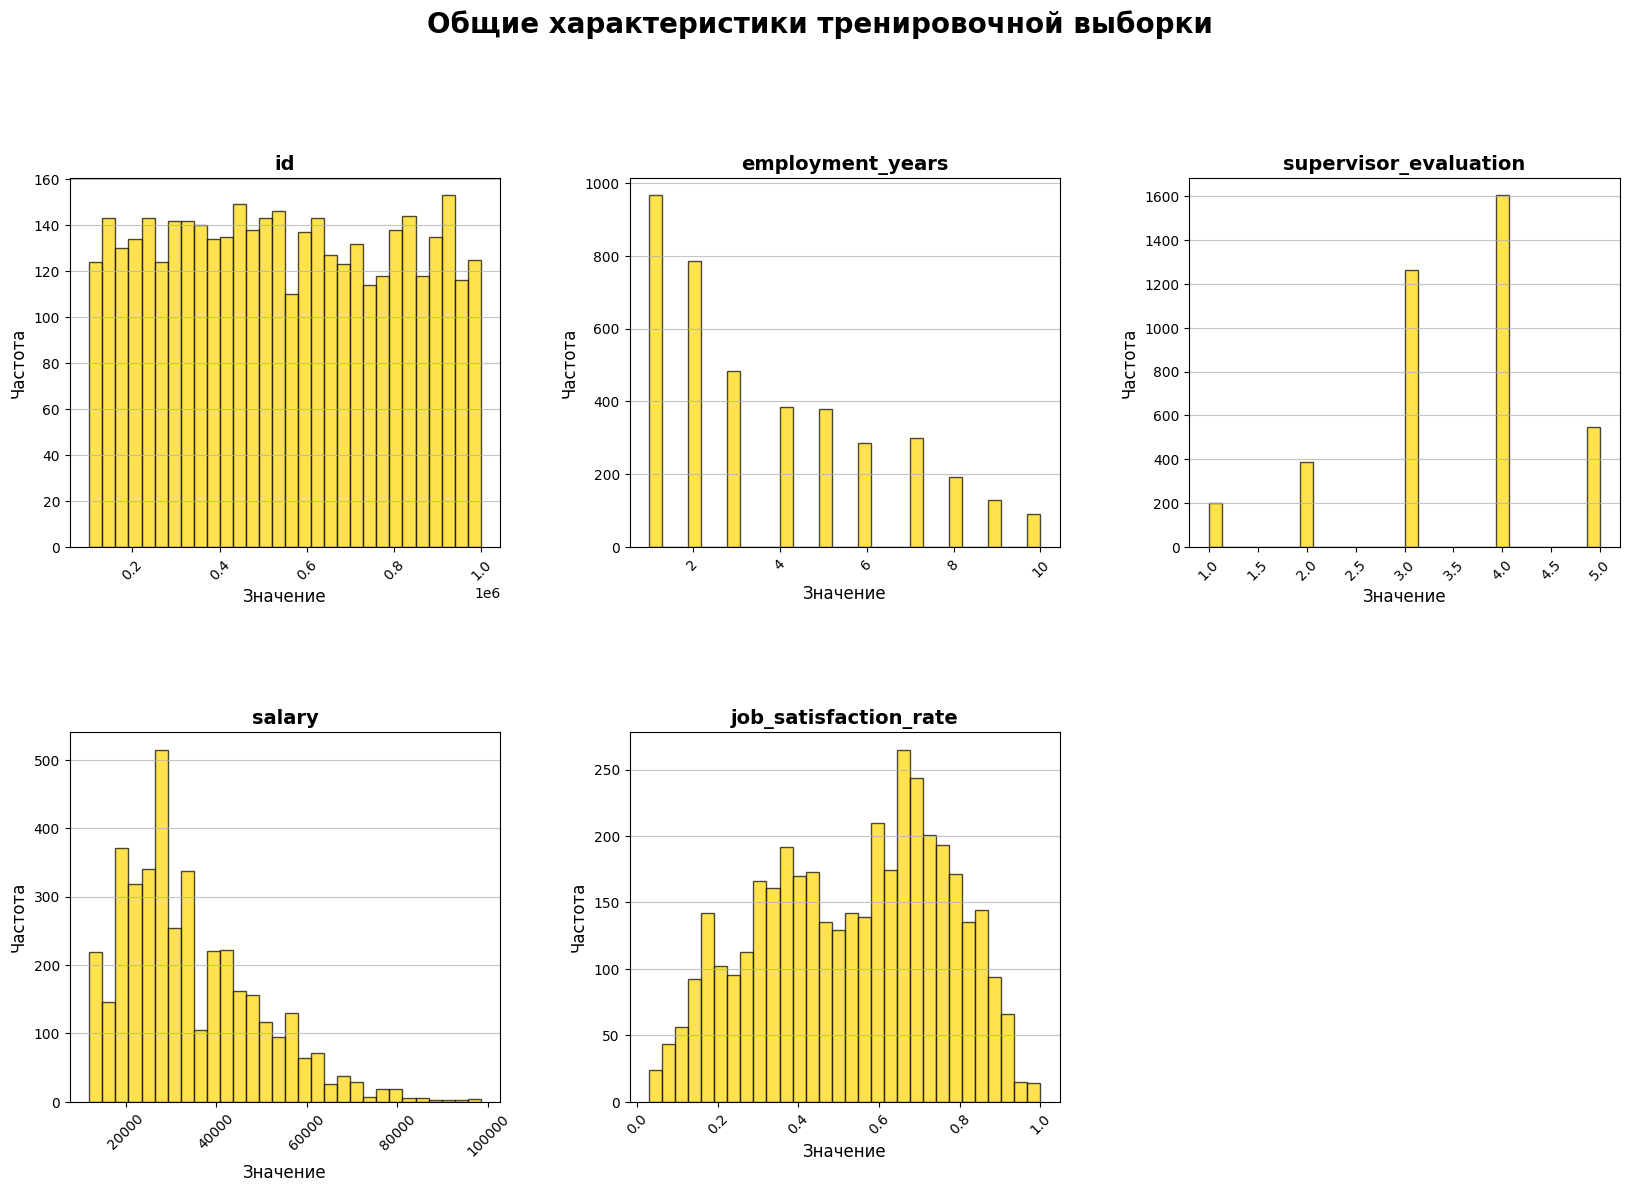

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

id  employment_years  supervisor_evaluation        salary
count    2000.000000       2000.000000            2000.000000   2000.000000
mean   552765.213500          3.666500               3.526500  34066.800000
std    253851.326129          2.537222               0.996892  15398.436729
min    100298.000000          1.000000               1.000000  12000.000000
25%    339052.000000          1.000000               3.000000  22800.000000
50%    550793.000000          3.000000               4.000000  30000.000000
75%    765763.750000          6.000000               4.000000  43200.000000
max    999029.000000         10.000000               5.000000  96000.000000

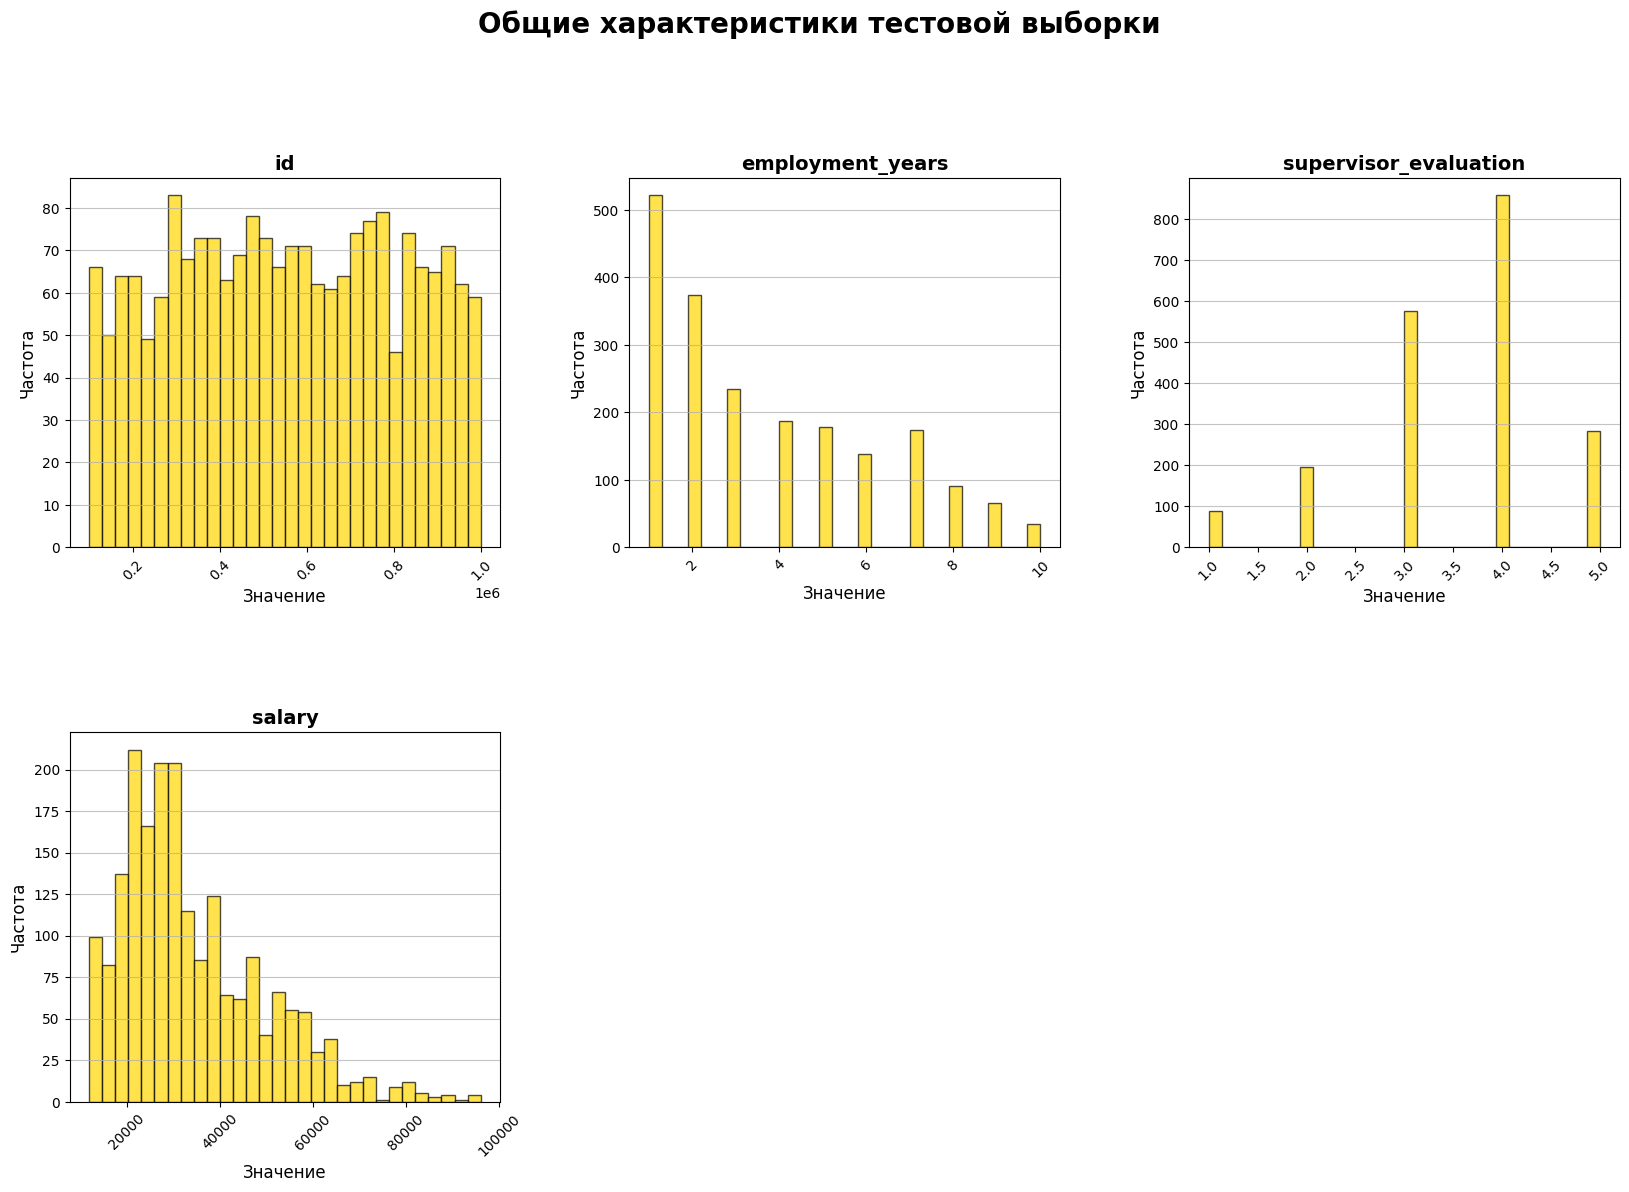

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

id  job_satisfaction_rate
0  130604                   0.74
1  825977                   0.75
2  418490                   0.60
3  555320                   0.72
4  826430                   0.08

id  job_satisfaction_rate
count    2000.000000             2000.00000
mean   552765.213500                0.54878
std    253851.326129                0.22011
min    100298.000000                0.03000
25%    339052.000000                0.38000
50%    550793.000000                0.58000
75%    765763.750000                0.72000
max    999029.000000                1.00000

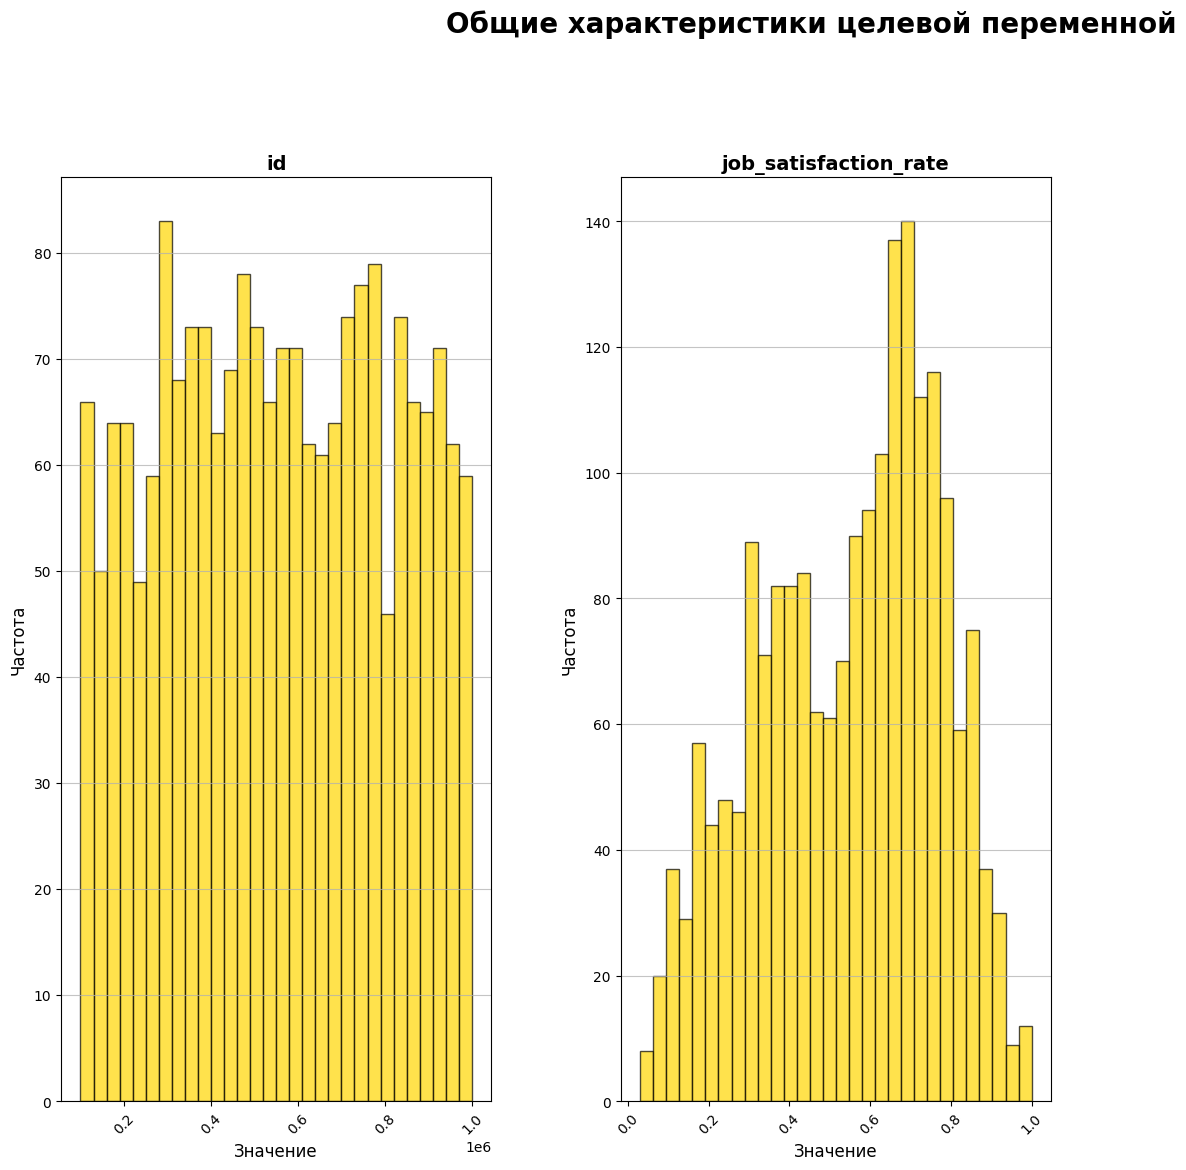

In [5]:
import matplotlib.pyplot as plt

def check_df(df, title):
    # информация о дф
    display(df.info())
    # первые 5 строк
    display(df.head())
    # описательная статистика
    display(df.describe())

    # Извлечение только числовых столбцов
    numeric_df = df.select_dtypes(include=['number'])

    if numeric_df.empty:
        print('нет числовых значений')
        return

    # гистограммы
    num_plots = len(numeric_df.columns)
    plt.figure(figsize=(20, 12))
    for i in range(num_plots):
        plt.subplot((num_plots + 2) // 3, 3, i + 1)
        plt.hist(numeric_df.iloc[:, i], bins=30, color='gold', edgecolor='black', alpha=0.7)
        plt.title(numeric_df.columns[i], fontsize=14, fontweight='bold')
        plt.xlabel('Значение', fontsize=12)
        plt.ylabel('Частота', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', alpha=0.75)

    plt.suptitle(title, fontsize=20, fontweight='bold', y=1.02)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()


check_df(train, title="Общие характеристики тренировочной выборки")
check_df(X_test, title="Общие характеристики тестовой выборки")
check_df(y_test, title="Общие характеристики целевой переменной")

### Вывод по изучению данных

1. **Общая информация о данных**
- **Тренировочная выборка** (`train_job_satisfaction_rate.csv`):
  - Всего 4000 записей и 10 колонок.
  - Признаки:
    - `id`: уникальный идентификатор сотрудника (4000 ненулевых значений).
    - `dept`: отдел (3994 ненулевых значения) — есть пропуски.
    - `level`: уровень должности (3996 ненулевых значений) — есть пропуски.
    - `workload`: уровень загруженности (4000 ненулевых значений) — тип данных `object`, требуется кодирование.
    - `employment_years`: количество лет работы в компании (4000 ненулевых значений) — тип данных `int64`.
    - `last_year_promo`: повышение за последний год (4000 ненулевых значений) — тип данных `object`, требуется кодирование.
    - `last_year_violations`: нарушения за последний год (4000 ненулевых значений) — тип данных `object`, требуется кодирование.
    - `supervisor_evaluation`: оценка руководителем (4000 ненулевых значений) — тип данных `int64`.
    - `salary`: ежемесячная зарплата (4000 ненулевых значений) — тип данных `int64`.
    - `job_satisfaction_rate`: уровень удовлетворенности (4000 ненулевых значений) — целевой признак, тип данных `float64`.

- **Тестовая выборка** (`test_features.csv`):
  - Всего 2000 записей и 9 колонок.
  - Признаки аналогичны тренировочной выборке, но с меньшим количеством ненулевых значений в `dept` (1998) и `level` (1999).

- **Целевой признак тестовой выборки** (`test_target_job_satisfaction_rate.csv`):
  - Всего 2000 записей, содержащих `id` и `job_satisfaction_rate`.
  - Показатели уровня удовлетворенности варьируются от 0.03 до 1, со средним значением 0.54878.

2. **Проблемы и недостатки данных**
- **Пропуски**:
  - В признаках `dept` и `level` имеются пропуски, что потребует обработки (например, заполнение или удаление).
  
- **Тип данных**:
  - Признаки, такие как `workload`, `last_year_promo`, и `last_year_violations`, имеют тип `object`, что может требовать кодирования для использования в моделях машинного обучения.

3. **Статистические характеристики**
- **Тренировочная выборка**:
  - Средний уровень удовлетворенности сотрудников ≈ 0.53, что указывает на умеренную удовлетворенность среди сотрудников.
  - Уровень загруженности варьируется от низкого до высокого, а зарплата сотрудников также имеет широкий диапазон (от 12000 до 98400).
  
- **Тестовая выборка**:
  - Средний уровень удовлетворенности в тестовой выборке составляет 0.55, что близко к тренировочной выборке, что может указывать на однородность данных.

4. **Рекомендации**
- Обработать пропуски в признаках `dept` и `level`.
- Кодировать категориальные признаки (`workload`, `last_year_promo`, `last_year_violations`, `dept`, `level`) с использованием методов, таких как `OneHotEncoder`, `OrdinalEncoder` или `LabelEncoder`.
- Проверить на наличие дубликатов и аномалий в данных, что может повлиять на качество моделей.

## Предобработка данных

### Обработка пропусков и дубликатов

#### Обработка неявных дубликатов

In [6]:
def preprocess_column(column):
    return column.str.lower().str.replace('ё', 'е', regex=False).str.replace('_', ' ', regex=False)

def display_value_counts(df, columns):
    for column in columns:
        df[column] = preprocess_column(df[column])
        display(df[column].value_counts())
        print()
    print('----------------------------')

display_value_counts(train, [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations'
])

dept
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: count, dtype: int64

level
junior    1894
middle    1744
sinior     358
Name: count, dtype: int64

workload
medium    2066
low       1200
high       734
Name: count, dtype: int64

last_year_promo
no     3880
yes     120
Name: count, dtype: int64

last_year_violations
no     3441
yes     559
Name: count, dtype: int64


----------------------------


Неявные дубликаты не обнаружены.

#### Обработка явных дубликатов и пропусков

In [7]:
# посчитаю количество пропусков и дубликатов в каждом столбце
def analyze_dataframe(df, df_name):
    print(f'Анализ: {df_name}')
    print('Количество пропусков в каждом столбце:')
    print(df.isna().sum())
    print('Дубликаты:', df.duplicated().sum())
    print()

analyze_dataframe(train, 'train')

Анализ: train
Количество пропусков в каждом столбце:
id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
Дубликаты: 0



- Обнаружено 6 и 4 пропусков в данных.
- Заполню их с помощью пайплайна на наиболее часто встречаемые значения.

In [8]:
impute_pipe = Pipeline([(
    'SimpleImputer',
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

In [9]:
gaps_col_names = ['dept', 'level', 'workload']

train[gaps_col_names] = impute_pipe.fit_transform(train[gaps_col_names])
analyze_dataframe(train, 'train')

Анализ: train
Количество пропусков в каждом столбце:
id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
Дубликаты: 0



Пропуски успешно обработаны.

### Обработка столбца id

In [10]:
# установка столбца id в качестве индекса
train.set_index('id', inplace=True)

# сброс индекса и приведение его к значениям, начинающимся с 0
train.reset_index(drop=True, inplace=True)

train.head()

dept   level workload  employment_years last_year_promo  \
0       sales  junior   medium                 2              no   
1          hr  junior     high                 2              no   
2       sales  junior      low                 1              no   
3  technology  junior      low                 4              no   
4          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

### Вывод по предобработке данных

1. **Обработка дубликатов и пропусков**

  - **Анализ пропусков и дубликатов**:
  - Анализ данных показал, что в столбцах `dept` и `level` были обнаружены пропуски:
    - `dept`: 6 пропусков
    - `level`: 4 пропуска. Также присутсвует граматическая ошибка (sinior), но она не повлияет на качество будущей модели.
    - Явные и неявные дубликаты отсутствуют.

  - **Обработка пропусков**:
    -  Пропуски были заполнены с приминением пайплайна из одного шага - `SimpleImputer`, после чего повторный анализ показал, что все столбцы теперь не содержат пропусков.

2. **Обработка ненужных данных**
  - Значения в столбце `id` были преобразованы в id.

## Исследовательский анализ данных

### Количественные признаки

In [11]:
# функция для визуализации количественных данных
def hist_box_df(df, column, title):
    plt.figure(figsize=(16, 6))
    plt.suptitle(title, fontsize=16)

    # если признак дискретный, используем countplot
    if df[column].nunique() < 20:
        plt.subplot(1, 1, 1)
        sns.countplot(data=df, x=column, color='gold', alpha=0.7, edgecolor='black')
        plt.title('Количество уникальных значений')
        plt.xlabel(title)
        plt.ylabel('Частота')
        plt.xticks(rotation=45)
    else:
        # гистограмма с плотностью для непрерывных признаков
        plt.subplot(1, 2, 1)
        plt.hist(df[column], bins=50, color='gold', alpha=0.7, edgecolor='black')
        plt.title('Гистограмма')
        plt.xlabel(title)
        plt.ylabel('Частота')

        # диаграмма размаха (ящик с усами) в паре с гистограммой
        plt.subplot(1, 2, 2)
        plt.boxplot(df[column])
        plt.title('Ящик с усами')
        plt.ylabel(title)

    plt.tight_layout()
    plt.show()

#### employment_years (Количество лет работы)
- **count**: 3990 — количество наблюдений.
- **mean**: 3.72 — среднее количество лет работы. В среднем сотрудники работают в организации около 3.72 лет.
- **std**: 2.54 — стандартное отклонение. Это значение показывает, насколько сильно количество лет работы варьируется среди сотрудников.
- **min**: 1 — минимальное количество лет работы. Наименьшее значение составляет 1 год, что означает, что есть сотрудники, работающие всего 1 год.
- **25%**: 2 — 25-й процентиль. 25% сотрудников работают 2 года или меньше.
- **50%**: 3 — медиана. Половина сотрудников работает 3 года или меньше.
- **75%**: 6 — 75-й процентиль. 75% сотрудников работают 6 лет или меньше.
- **max**: 10 — максимальное количество лет работы. Наибольшее значение составляет 10 лет, что означает, что есть сотрудники, работающие в организации 10 лет.

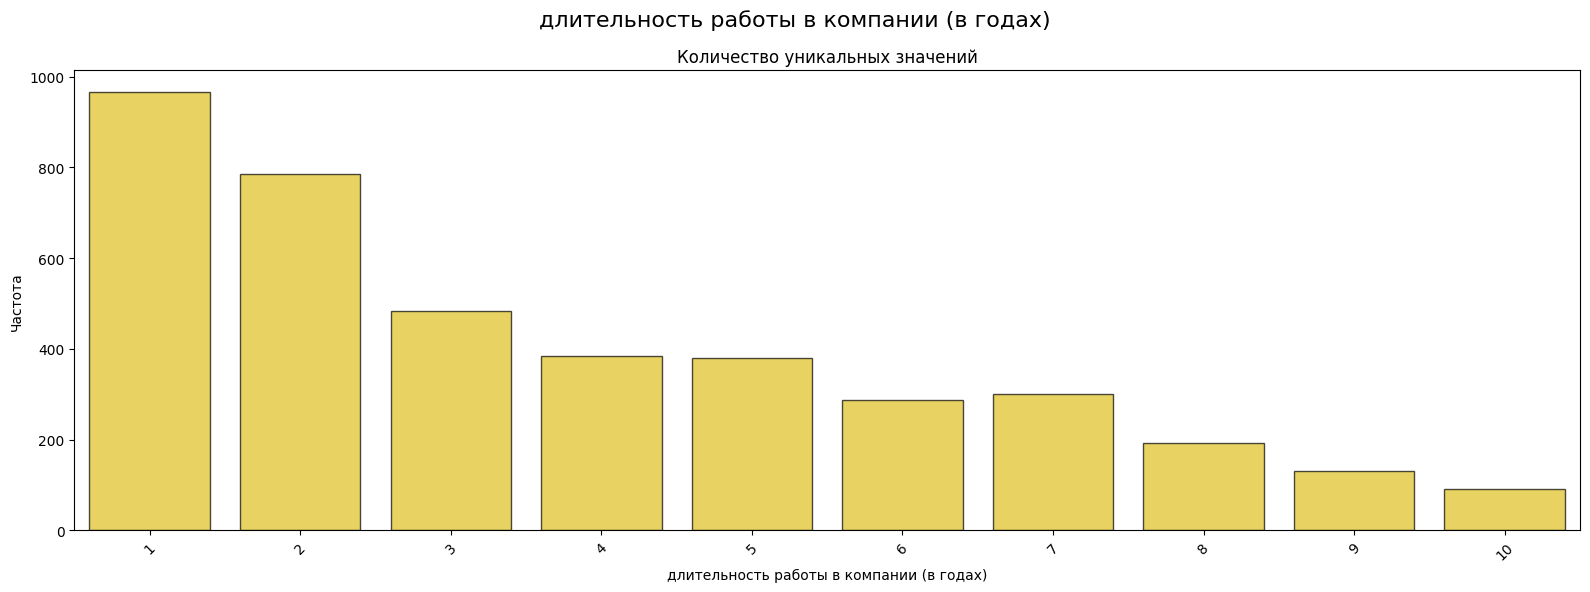

In [12]:
hist_box_df(train, 'employment_years', 'длительность работы в компании (в годах)')

- Распределения нет - явный убывающий тренд.

#### supervisor_evaluation (Оценка руководителя)
- **count**: 3990 — количество наблюдений.
- **mean**: 3.48 — средняя оценка, выданная руководителями. В среднем сотрудники получают оценку около 3.48 из возможных значений (от 1 до 5).
- **std**: 1.01 — стандартное отклонение. Это значение демонстрирует, насколько оценки варьируются среди сотрудников.
- **min**: 1 — минимальная оценка. Наименьшая оценка, выданная сотруднику, составляет 1.
- **25%**: 3 — 25-й процентиль. 25% сотрудников получили оценку 3 или ниже.
- **50%**: 4 — медиана. Половина сотрудников получила оценку 4 или ниже.
- **75%**: 4 — 75-й процентиль. 75% сотрудников получили оценку 4 или ниже.
- **max**: 5 — максимальная оценка. Наивысшая оценка, выданная сотруднику, составляет 5.

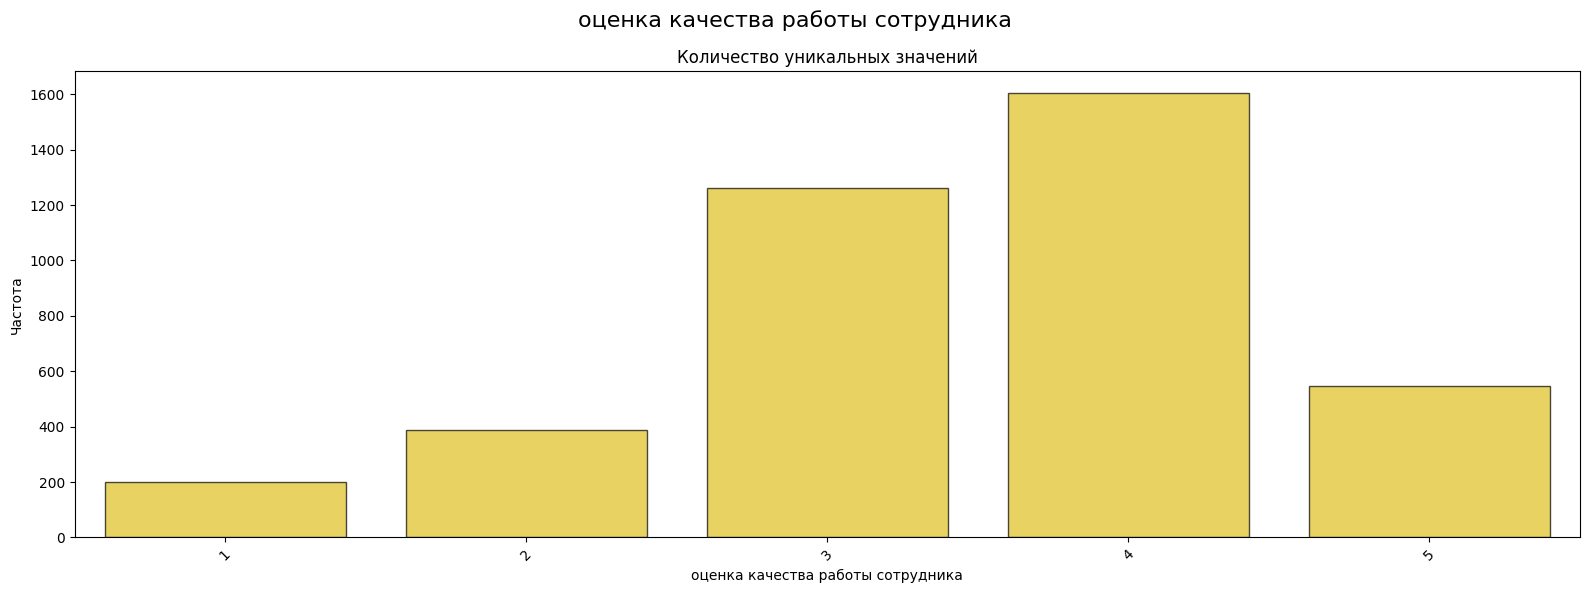

In [13]:
hist_box_df(train, 'supervisor_evaluation', 'оценка качества работы сотрудника')

- Распределение похоже на нормальное, но с небольшим смещением вправо.

#### salary (Зарплата)
- **count**: 3990 — количество наблюдений.
- **mean**: 33953.38 — средняя зарплата. В среднем сотрудники получают около 33,953.38 единиц (валюта не указана).
- **std**: 14907.25 — стандартное отклонение. Это значение показывает, насколько сильно зарплаты варьируются среди сотрудников.
- **min**: 12000 — минимальная зарплата. Наименьшая зарплата составляет 12,000 единиц.
- **25%**: 22800 — 25-й процентиль. 25% сотрудников получают 22,800 единиц или меньше.
- **50%**: 30000 — медиана. Половина сотрудников зарабатывает 30,000 единиц или меньше.
- **75%**: 43200 — 75-й процентиль. 75% сотрудников зарабатывают 43,200 единиц или меньше.
- **max**: 98400 — максимальная зарплата. Наибольшая зарплата составляет 98,400 единиц.

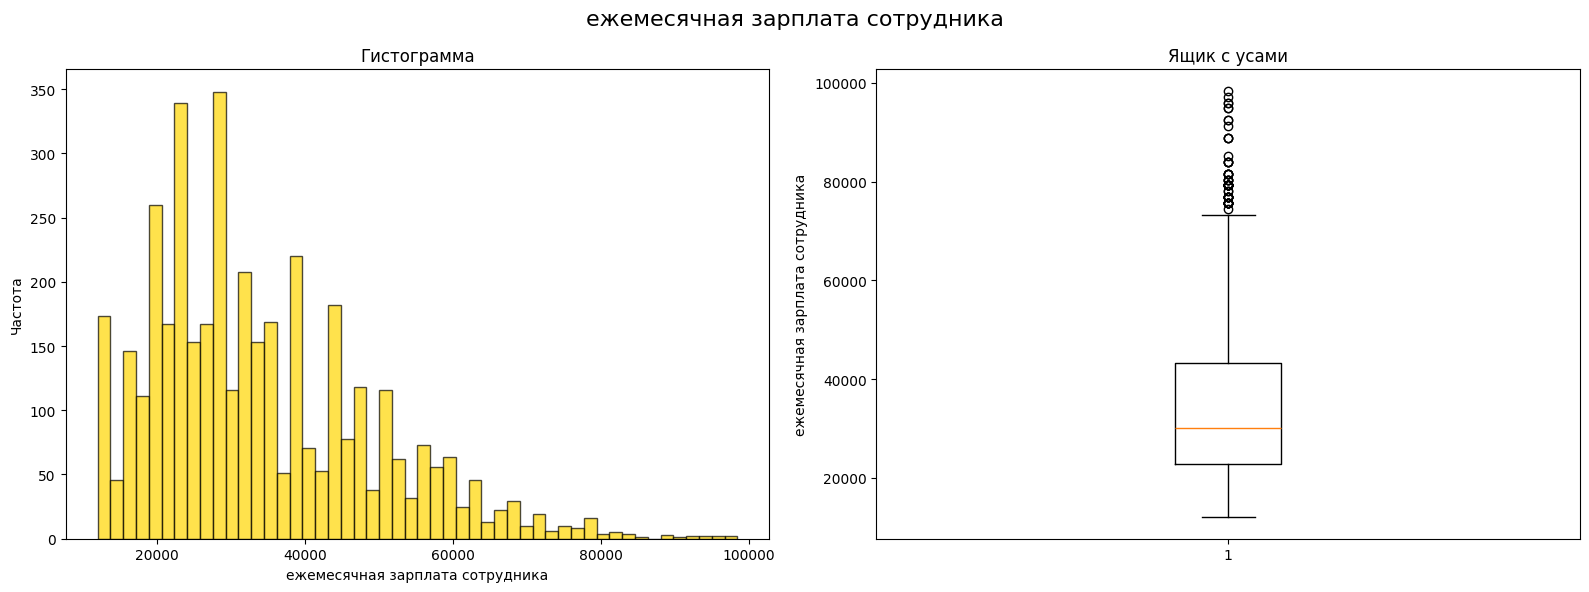

In [14]:
hist_box_df(train, 'salary', 'ежемесячная зарплата сотрудника')

- Распределение не похоже на нормальное (есть смещение влево, присутсвует ассимметрия, напоминает горку, в данных большое количество вариаций, от чего на графике гистограмме много пиков)
- Выбросы на значениях более 75000 единиц.

In [15]:
train.query('salary >= 75000')

dept   level workload  employment_years last_year_promo  \
45    technology  sinior     high                 3              no   
141    marketing  sinior     high                 7              no   
196    marketing  sinior     high                 9              no   
360    marketing  sinior     high                 7              no   
427        sales  sinior     high                 2              no   
1040          hr  sinior     high                 7              no   
1203  technology  sinior     high                10              no   
1241  technology  sinior     high                 4              no   
1491   marketing  sinior     high                 4              no   
1543       sales  sinior     high                 5              no   
1591  purchasing  sinior     high                 4              no   
1655       sales  sinior     high                 8              no   
1718  purchasing  sinior     high                 9              no   
1799   marketing  sinior     high                10              no   
1855  technology  sinior     high                 6              no   
1899  technology  sinior     high                 6              no   
1979       sales  sinior     high                 2              no   
1981  technology  sinior     high                 9              no   
1982  technology  sinior     high                 7              no   
2146       sales  sinior     high                 2              no   
2199  purchasing  sinior     high                 1              no   
2248   marketing  sinior     high                 6              no   
2429  technology  sinior     high                 8              no   
2430          hr  sinior     high                 8              no   
2435       sales  sinior     high                 7              no   
2469  technology  sinior     high                 5              no   
2670  technology  sinior     high                 3             yes   
2691          hr  sinior     high                 8              no   
2702       sales  sinior     high                 5              no   
2712   marketing  sinior     high                10              no   
2717  technology  sinior     high                 5              no   
2746  technology  sinior     high                 6              no   
2750  technology  sinior     high                 9             yes   
2774  technology  sinior     high                 5              no   
2810       sales  sinior     high                 4              no   
2845  technology  sinior     high                 5              no   
2901  technology  sinior     high                10              no   
2932   marketing  sinior     high                 4              no   
3016  technology  sinior     high                 2              no   
3024  technology  sinior     high                 6              no   
3080   marketing  sinior     high                 8             yes   
3150   marketing  sinior     high                 8              no   
3178  purchasing  sinior     high                 2              no   
3239  purchasing  sinior     high                 4              no   
3249       sales  sinior     high                 8              no   
3302  purchasing  sinior     high                 2              no   
3303          hr  sinior     high                 7              no   
3458       sales  sinior     high                 9              no   
3461   marketing  sinior     high                 5              no   
3473  purchasing  sinior     high                 8              no   
3566  technology  sinior     high                 2             yes   
3570  purchasing  sinior     high                 8              no   
3571       sales  sinior     high                 1              no   
3800          hr  sinior     high                 3              no   
3828       sales  sinior     high                 5              no   
3839  technology  sinior     high   

Это не выбросы. Все сотрудники в данном списке являются синьорами с высоким уровнем загруженности, поэтому не удивительно, что у них зарплата выше среднего. 

#### job_satisfaction_rate (Уровень удовлетворенности работой)
- **count**: 3990 — количество наблюдений.
- **mean**: 0.53 — средний уровень удовлетворенности. В среднем уровень удовлетворенности сотрудников составляет около 53%.
- **std**: 0.23 — стандартное отклонение. Это значение показывает, насколько сильно уровень удовлетворенности варьируется среди сотрудников.
- **min**: 0.03 — минимальный уровень удовлетворенности. Наименьший уровень удовлетворенности составляет 3%.
- **25%**: 0.36 — 25-й процентиль. 25% сотрудников имеют уровень удовлетворенности 36% или ниже.
- **50%**: 0.56 — медиана. Половина сотрудников имеет уровень удовлетворенности 56% или ниже.
- **75%**: 0.71 — 75-й процентиль. 75% сотрудников имеют уровень удовлетворенности 71% или ниже.
- **max**: 1.00 — максимальный уровень удовлетворенности. Наивысший уровень удовлетворенности составляет 100%.

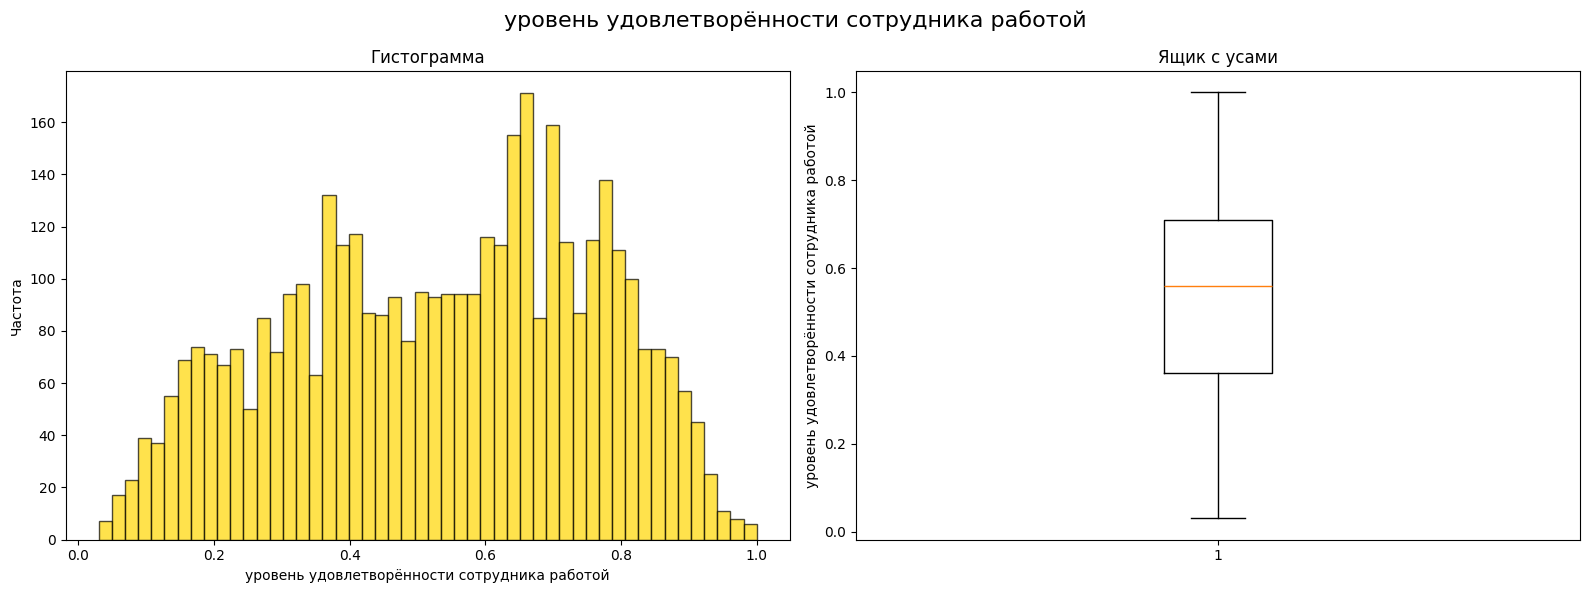

In [16]:
hist_box_df(train, 'job_satisfaction_rate', 'уровень удовлетворённости сотрудника работой')

- Распределение напоминает нормальное (несколько пиков, ассиметричная гистограмма)
- Выбросов нет.

### Категориальнные признаки

In [17]:
train.dtypes

dept                      object
level                     object
workload                  object
employment_years           int64
last_year_promo           object
last_year_violations      object
supervisor_evaluation      int64
salary                     int64
job_satisfaction_rate    float64
dtype: object

In [18]:
# фукнция для категориальных значений
def bar_plotter(df, column, title):
    plt.figure(figsize=(12, 5))
    
    counts = df[column].value_counts()

    bars = plt.bar(counts.index, counts.values, color='gold', edgecolor='black', alpha=0.7)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')  # Центрируем текст

    plt.title(title)
    plt.ylabel('Количество')
    plt.xlabel(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    plt.show()

#### Отдел

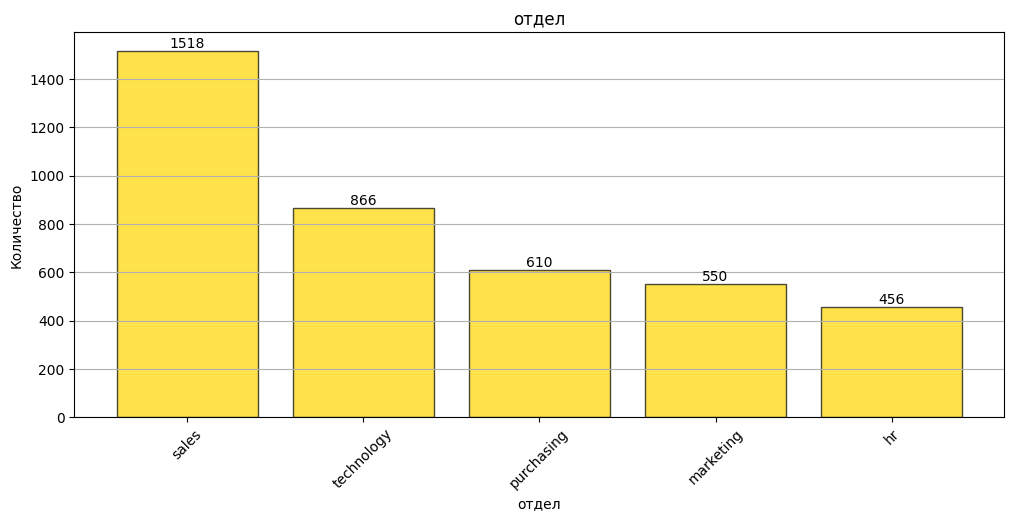

In [19]:
bar_plotter(train, 'dept', 'отдел')

- Отдел продаж самый многочисленный в компании - 1508 сотрудников.
- Самый маленький отдел - HR, всего 456 сотрудников.

#### Уровень должности

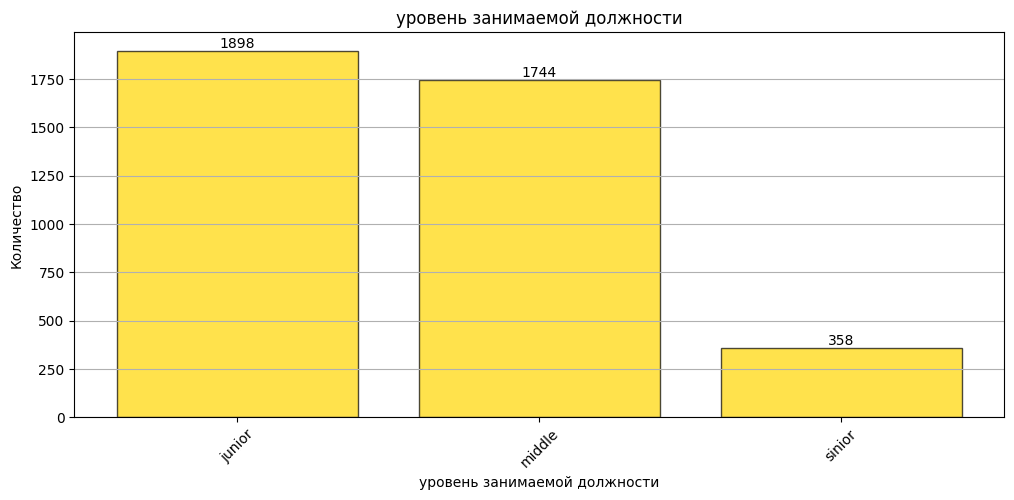

In [20]:
bar_plotter(train, 'level', 'уровень занимаемой должности')

- Ожидаемые значения - джуниоров наибольшее количество, сеньоров наименьшее.

#### Уровень загруженности

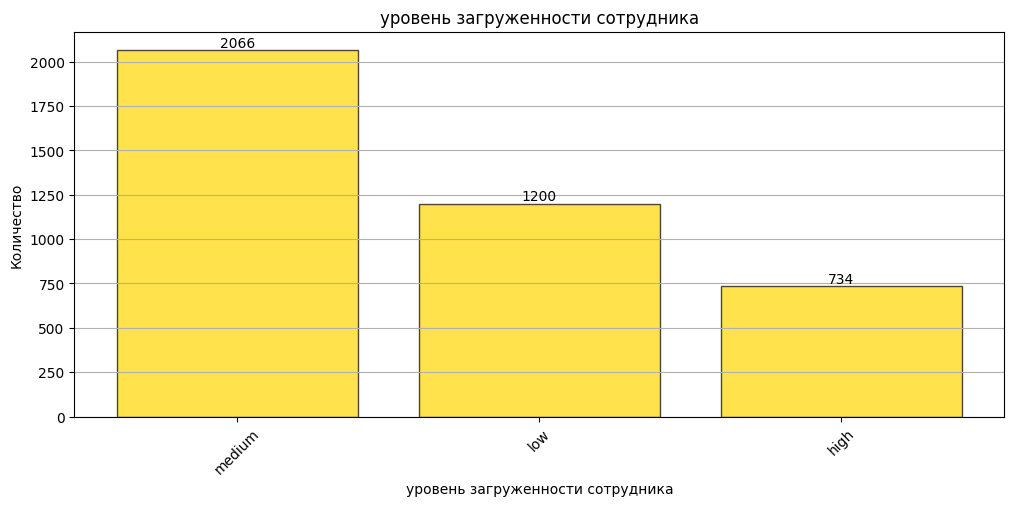

In [21]:
bar_plotter(train, 'workload', 'уровень загруженности сотрудника')

- Так же ожидаемые показатели - средняя загруженность преобладает в рядах работников.

#### Повышение за последний год

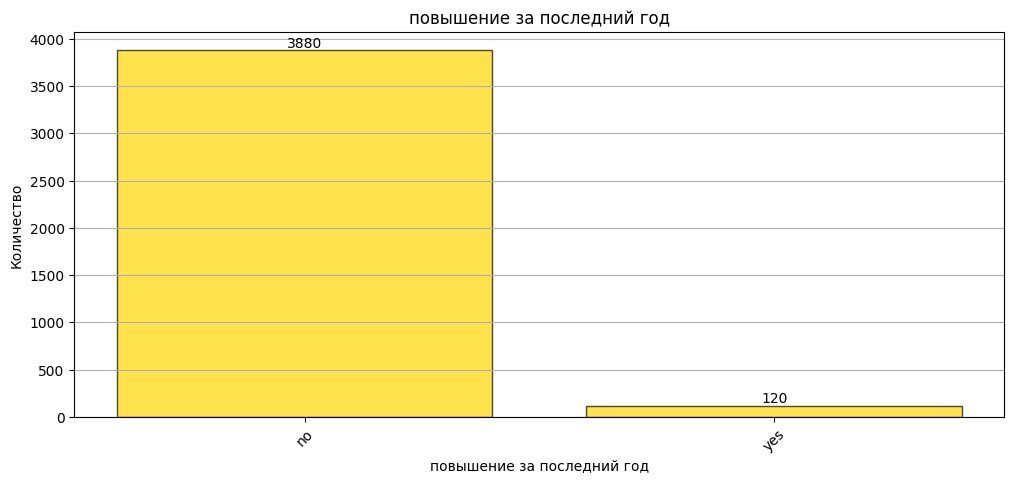

In [22]:
bar_plotter(train, 'last_year_promo', 'повышение за последний год')

- За последний год получили повышение всего 120 сотрудников.

#### Нарушения за последний год

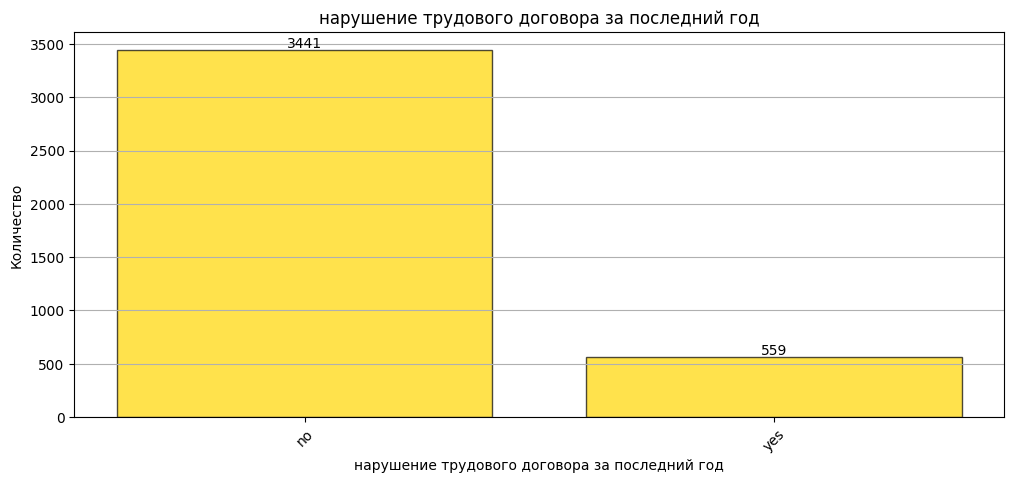

In [23]:
bar_plotter(train, 'last_year_violations', 'нарушение трудового договора за последний год')

- Почти 1/7 часть сотрудников нарушала ТК за последний год.

### Вывод по исследовательскому анализу данных

1. **Количественные признаки**

- **Количество лет работы (employment_years)**:
   - В среднем сотрудники работают в компании около 3.72 лет, но наблюдается явный убывающий тренд в распределении. Минимальное значение составляет 1 год, тогда как максимальное — 10 лет. Выбросов в этих данных не выявлено.

- **Оценка руководителя (supervisor_evaluation)**:
   - Среднее значение оценки составляет 3.48, что указывает на достаточно высокую оценку работы сотрудников. Распределение похоже на нормальное, но с небольшим смещением вправо. Выявлены выбросы на значении 1, однако, это скорее всего не выбросы, а отражение низкой производительности некоторых сотрудников.

- **Зарплата (salary)**:
   - Средняя зарплата составляет 33,953.38 единиц. Распределение не является нормальным, присутствует ассиметрия, и наблюдаются "выбросы" на значениях выше 75,000 единиц. Они, как правило, связаны с сеньорами, работающими с высокой нагрузкой.

- **Уровень удовлетворенности работой (job_satisfaction_rate)**:
   - Средний уровень удовлетворенности составляет 53%. Распределение напоминает нормальное, с несколькими пиками, но выбросов не найдено.

2. **Категориальные признаки**

- **Отдел (dept)**:
   - Наибольшее количество сотрудников работает в отделе продаж (1508 сотрудников), тогда как в отделе HR всего 456 сотрудников, что указывает на дисбаланс в распределении сотрудников по отделам.

- **Уровень должности (level)**:
   - Как и ожидалось, наибольшее количество сотрудников занимают должности джуниоров, тогда как сеньоров наименьшее количество.

- **Уровень загруженности (workload)**:
   - Преобладает средняя загруженность среди сотрудников, что также соответствует ожиданиям.

- **Повышение за последний год (last_year_promo)**:
   - За последний год повышение получили всего 120 сотрудников, что может указывать на стабильность в организации или высокие требования к повышению.

- **Нарушения за последний год (last_year_violations)**:
   - Почти 1/7 часть сотрудников нарушала трудовой кодекс за последний год, что может быть поводом для более глубокого анализа политики управления персоналом.

3. **Общие выводы**

- В большинстве случаев распределения признаков не являются нормальными, что может затруднить дальнейший анализ и моделирование.
- Данные содержат много информации, но присутствуют выбросы и дисбалансы, которые необходимо учитывать при дальнейшем анализе и разработке моделей.

## Корреляционный анализ данных

### Корреляционная матрица

In [24]:
train.dtypes
train

dept   level workload  employment_years last_year_promo  \
0          sales  junior   medium                 2              no   
1             hr  junior     high                 2              no   
2          sales  junior      low                 1              no   
3     technology  junior      low                 4              no   
4             hr  junior   medium                 1              no   
...          ...     ...      ...               ...             ...   
3995  technology  junior     high                 2              no   
3996       sales  junior   medium                 2              no   
3997       sales  middle      low                 7              no   
3998       sales  junior   medium                 2              no   
3999  technology  middle   medium                 5              no   

     last_year_violations  supervisor_evaluation  salary  \
0                      no                      1   24000   
1                      no                      5   38400   
2                      no                      2   12000   
3                      no                      2   18000   
4                      no                      3   22800   
...                   ...                    ...     ...   
3995                   no                      3   46800   
3996                   no                      4   21600   
3997                   no                      5   24000   
3998                   no                      3   24000   
3999                  yes                      1   44400   

      job_satisfaction_rate  
0                      0.58  
1                      0.76  
2                      0.11  
3                      0.37  
4                      0.20  
...                     ...  
3995                   0.45  
3996                   0.68  
3997                   0.76  
3998                   0.48  
3999                   0.18  

[4000 rows x 9 columns]

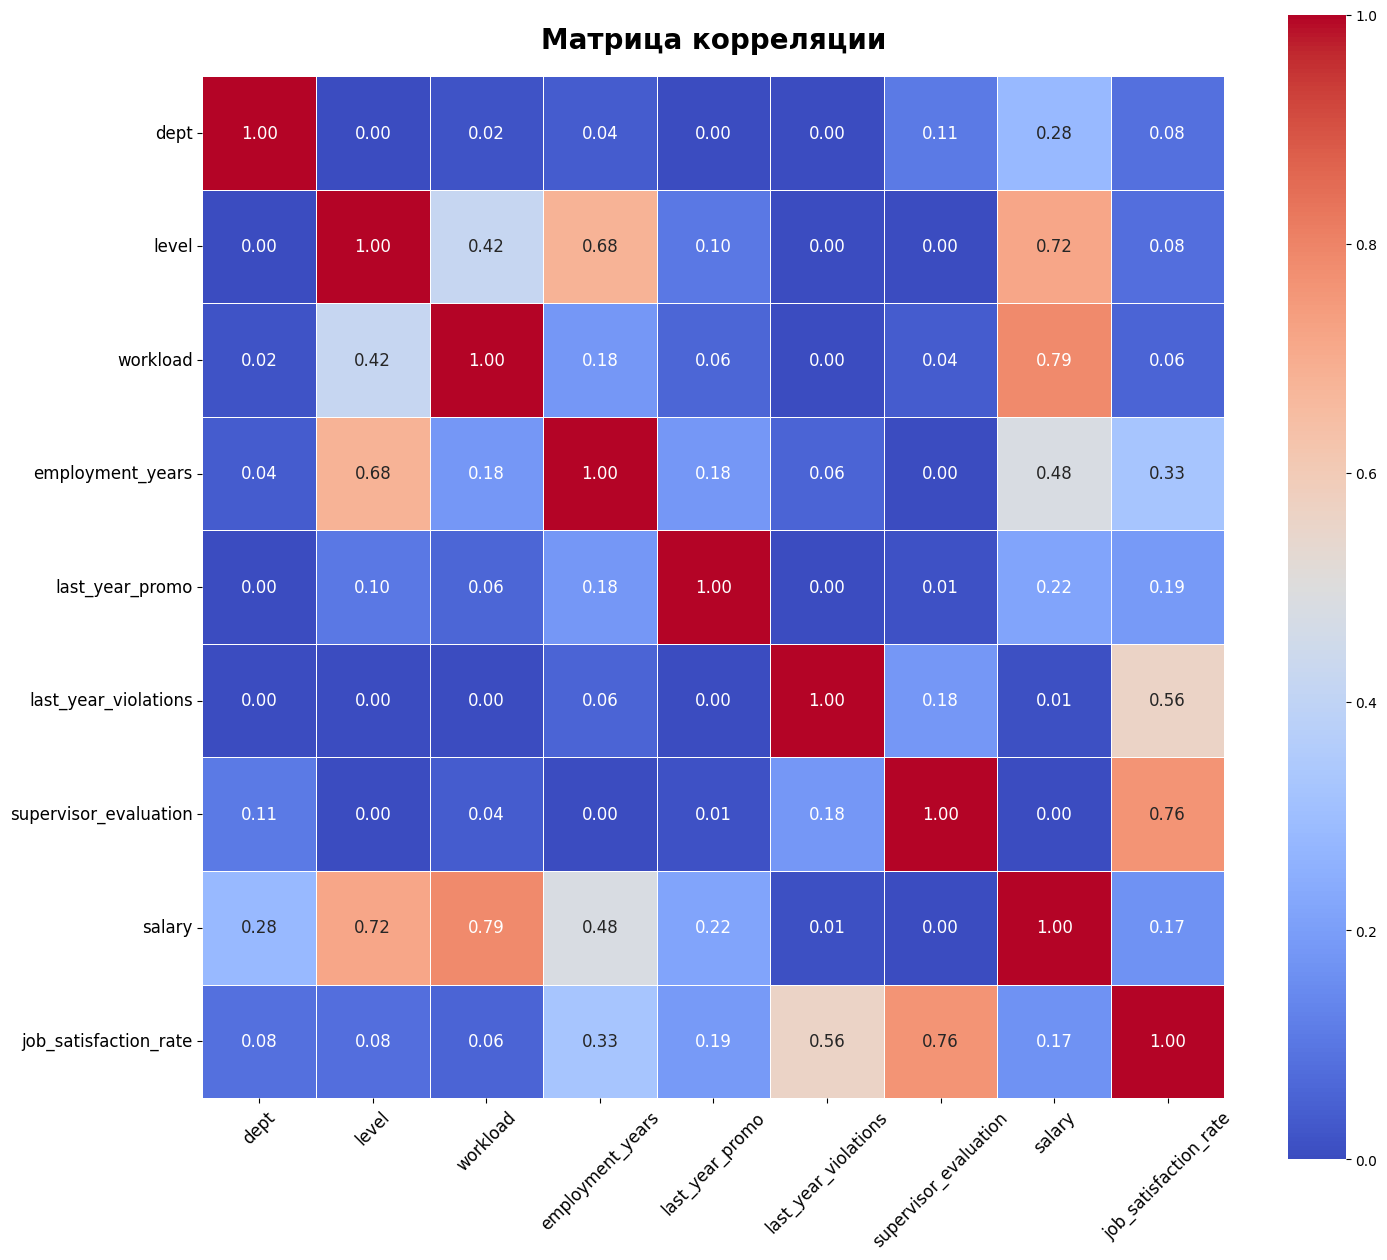

In [25]:
interval_cols = ['job_satisfaction_rate', 'salary']

corr_matrix = train.phik_matrix(interval_cols=interval_cols)


plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm', cbar_kws={"shrink": .8},
            annot_kws={"size": 12}, fmt=".2f", linewidths=.5)

plt.title('Матрица корреляции', fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Показ графика
plt.tight_layout()
plt.show()

In [26]:
# определение силы корреляции
def corr_strength(corr_value):
    if corr_value >= 0.7:
        return 'Сильная положительная корреляция'
    elif 0.3 <= corr_value < 0.7:
        return 'Умеренная положительная корреляция'
    elif -0.3 < corr_value < 0.3:
        return 'Отсутствие корреляции'
    elif -0.7 <= corr_value < -0.3:
        return 'Умеренная отрицательная корреляция'
    elif corr_value <= -0.7:
        return 'Сильная отрицательная корреляция'

corr_labels = corr_matrix.stack().apply(corr_strength).unstack()
corr_labels

dept  \
dept                   Сильная положительная корреляция   
level                             Отсутствие корреляции   
workload                          Отсутствие корреляции   
employment_years                  Отсутствие корреляции   
last_year_promo                   Отсутствие корреляции   
last_year_violations              Отсутствие корреляции   
supervisor_evaluation             Отсутствие корреляции   
salary                            Отсутствие корреляции   
job_satisfaction_rate             Отсутствие корреляции   

                                                    level  \
dept                                Отсутствие корреляции   
level                    Сильная положительная корреляция   
workload               Умеренная положительная корреляция   
employment_years       Умеренная положительная корреляция   
last_year_promo                     Отсутствие корреляции   
last_year_violations                Отсутствие корреляции   
supervisor_evaluation               Отсутствие корреляции   
salary                   Сильная положительная корреляция   
job_satisfaction_rate               Отсутствие корреляции   

                                                 workload  \
dept                                Отсутствие корреляции   
level                  Умеренная положительная корреляция   
workload                 Сильная положительная корреляция   
employment_years                    Отсутствие корреляции   
last_year_promo                     Отсутствие корреляции   
last_year_violations                Отсутствие корреляции   
supervisor_evaluation               Отсутствие корреляции   
salary                   Сильная положительная корреляция   
job_satisfaction_rate               Отсутствие корреляции   

                                         employment_years  \
dept                                Отсутствие корреляции   
level                  Умеренная положительная корреляция   
workload                            Отсутствие корреляции   
employment_years         Сильная положительная корреляция   
last_year_promo                     Отсутствие корреляции   
last_year_violations                Отсутствие корреляции   
supervisor_evaluation               Отсутствие корреляции   
salary                 Умеренная положительная корреляция   
job_satisfaction_rate  Умеренная положительная корреляция   

                                        last_year_promo  \
dept                              Отсутствие корреляции   
level                             Отсутствие корреляции   
workload                          Отсутствие корреляции   
employment_years                  Отсутствие корреляции   
last_year_promo        Сильная положительная корреляция   
last_year_violations              Отсутствие корреляции   
supervisor_evaluation             Отсутствие корреляции   
salary                            Отсутствие корреляции   
job_satisfaction_rate             Отсутствие корреляции   

                                     last_year_violations  \
dept                                Отсутствие корреляции   
level                               Отсутствие корреляции   
workload                            Отсутствие корреляции   
employment_years                    Отсутствие корреляции   
last_year_promo                     Отсутствие корреляции   
last_year_violations     Сильная положительная корреляция   
supervisor_evaluation               Отсутствие корреляции   
salary                              Отсутствие корреляции   
job_satisfaction_rate  Умеренная положительная корреляция   

                                  supervisor_evaluation  \
dept                              Отсутствие корреляции   
level                             Отсутствие корреляции   
workload                          Отсутствие корреляции   
employment_years                  Отсутствие корреляции   
last_year_promo                   Отсутствие корреляции   
last_year_violations              Отсутствие корреляции   
supervisor_e

На основе представленных данных о корреляциях между различными переменными можно сделать несколько ключевых выводов о взаимосвязях в наборе данных. Вот основные наблюдения:

**1. Сильная положительная корреляция**
- **Между `dept` и `job_satisfaction_rate`**: Высокое удовлетворение может быть связано с определенными отделами, что требует дополнительного анализа для выявления факторов, способствующих этому.
- **Между `level` и `salary`**: Более высокие должности коррелируют с более высокой зарплатой, что подтверждает ожидания о прогрессии в карьере.
- **Между `supervisor_evaluation` и `job_satisfaction_rate`**: Высокие оценки от руководителей связаны с высоким уровнем удовлетворенности сотрудников, что подчеркивает важность обратной связи и оценки работы.

**2. Умеренная положительная корреляция**
- **Между `employment_years` и `job_satisfaction_rate`**: Большее количество лет работы может быть связано с более высоким уровнем удовлетворенности, что может указывать на то, что сотрудники, долго работающие в компании, имеют более позитивный опыт.
- **Между `workload` и `salary`**: Уровень загруженности может влиять на зарплату.

**3. Отсутствие корреляции**
- **`last_year_promo` и `last_year_violations`**: Эти признаки не имеют значимой корреляции с другими, что может указывать на их независимость или отсутствие влияния на уровень удовлетворенности. Это требует дальнейшего изучения для понимания их роли в контексте управления персоналом.

**4. Мультиколлинеарность**:
- Мультиколлинеарность возникает при корреляции между переменными при значении корреляции выше 0.95.
- В предоставленных данных этого явления **нет**.

### График зависимости признаков

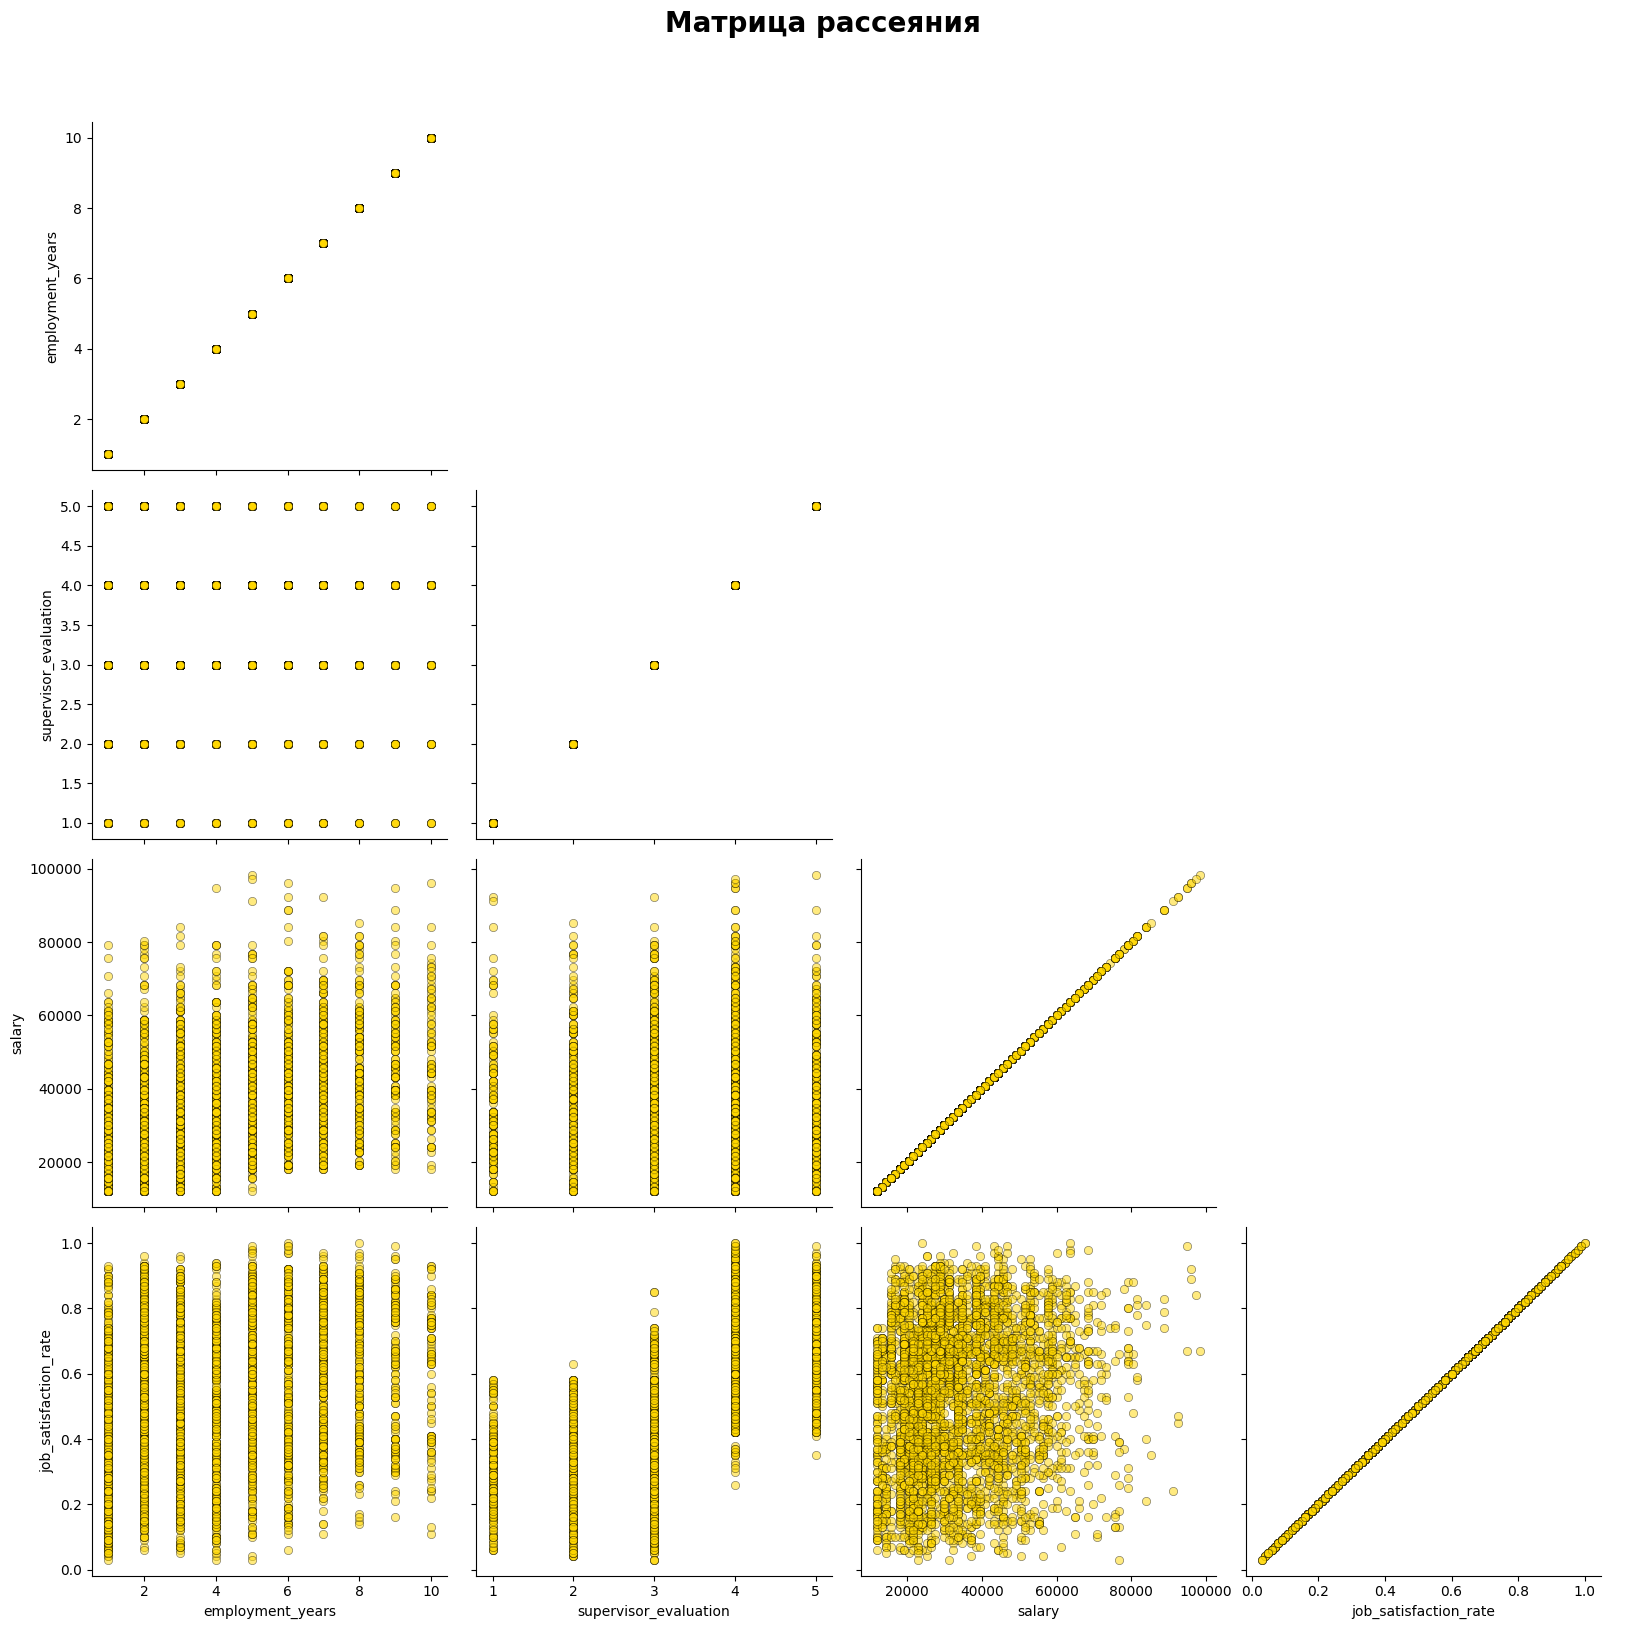

In [27]:
numeric_cols = train.select_dtypes(include=['number']).columns.tolist()

relation_corr = sns.PairGrid(train[numeric_cols], diag_sharey=False, corner=True, height=4)

relation_corr.map(sns.scatterplot, color='gold', edgecolor='black', alpha=0.5)

relation_corr.add_legend()

plt.suptitle('Матрица рассеяния', fontsize=20, fontweight='bold', y=1.02)  # Заголовок графика
plt.subplots_adjust(top=0.95)  # Поднимаем заголовок графика
plt.show()

- Между коррелирующими с целевым признаком `supervisor_evaluation` и `salary` можно заметить неболььшую нелинейную зависимость.
- Между остальными признаками с целевым и между собой связей нет.

### Вывод по корреляционному анализу данных

**1. Сильная положительная корреляция**
- **Между `dept` и `job_satisfaction_rate`**: Высокое удовлетворение связано с определенными отделами, что требует дополнительного анализа.
- **Между `level` и `salary`**: Более высокие должности коррелируют с высокой зарплатой, подтверждая ожидания о карьерном росте.
- **Между `supervisor_evaluation` и `job_satisfaction_rate`**: Высокие оценки от руководителей связаны с высоким уровнем удовлетворенности, подчеркивая важность обратной связи.

**2. Умеренная положительная корреляция**
- **Между `employment_years` и `job_satisfaction_rate`**: Большее количество лет работы может быть связано с более высоким уровнем удовлетворенности.
- **Между `workload` и `salary`**: Уровень загруженности может влиять на зарплату.

**3. Отсутствие корреляции**
- **`last_year_promo` и `last_year_violations`**: Эти признаки не имеют значимой корреляции с другими, что может указывать на их независимость.

**4. Нелинейные зависимости:**
- Между признаками, коррелирующими с целевым, такими как **`supervisor_evaluation`** и **`salary`**, наблюдается незначительная нелинейная зависимость. Остальные количественные признаки не имеют значительных связей ни с целевым признаком, ни между собой.

**5. Мультиколлинеарность:**
- Не было обнаружено явных признаков мультиколлинеарности (корреляция выше 0.95) в данных, что позволяет использовать корреляционные коэффициенты для анализа взаимосвязей без значительных искажений.

## Подготовка данных

### Разделение данных

In [28]:
train.head()

dept   level workload  employment_years last_year_promo  \
0       sales  junior   medium                 2              no   
1          hr  junior     high                 2              no   
2       sales  junior      low                 1              no   
3  technology  junior      low                 4              no   
4          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

In [29]:
X_train = train.drop(columns=['job_satisfaction_rate'])
y_train = train['job_satisfaction_rate']
X_train.shape, y_train.shape

((4000, 8), (4000,))

In [30]:
num_columns = [
    'employment_years',
    'supervisor_evaluation', 
    'salary'
]

ord_columns = [
    'workload', #уровень загруженности (low, medium, high) можно считать порядковым
    'level' # уровень должности (junior, middle, senior)
]

ohe_columns = [
    'dept',
    'last_year_promo',
    'last_year_violations'
]

### Создание пайплайнов

In [31]:
ohe_pipe = Pipeline(
    [
        ('imputer', impute_pipe), 
        ('ohe', 
         OneHotEncoder(drop='first', 
                       handle_unknown='ignore', 
                       sparse_output=False))
    ]
)
ohe_pipe

Pipeline(steps=[('imputer',
                 Pipeline(steps=[('SimpleImputer',
                                  SimpleImputer(strategy='most_frequent'))])),
                ('ohe',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

In [32]:
ord_pipe = Pipeline(steps=[
    ('ord', OrdinalEncoder(categories=[
        ['low', 'medium', 'high'],  # порядок для workload
        ['junior', 'middle', 'sinior']  # порядок для level
    ],
    handle_unknown='use_encoded_value', unknown_value=np.nan))
])
ord_pipe

Pipeline(steps=[('ord',
                 OrdinalEncoder(categories=[['low', 'medium', 'high'],
                                            ['junior', 'middle', 'sinior']],
                                handle_unknown='use_encoded_value',
                                unknown_value=nan))])

In [33]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),        
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough',
    force_int_remainder_cols=False
) 
data_preprocessor

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('imputer',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))])),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['dept', 'last_year_promo',
                                  'last_year_violations']),
                                ('ord',
                                 Pipeline(steps=[('ord',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high'],
                                                                             ['junior',
                                                                              'middle',
                                                                              'sinior']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan))]),
                                 ['workload', 'level']),
                                ('num', StandardScaler(),
                                 ['employment_years', 'supervisor_evaluation',
                                  'salary'])])

### Итоговые пайплайны

#### Дерево решений

In [34]:
dtr_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])
dtr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   Pipeline(steps=[('SimpleImputer',
                                                                                    SimpleImputer(strategy='most_frequent'))])),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high'],
                                                                                              ['junior',
                                                                                               'middle',
                                                                                               'sinior']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['workload', 'level']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models', DecisionTreeRegressor(random_state=42))])

#### Линейная регрессия

In [35]:
lr_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])
lr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   Pipeline(steps=[('SimpleImputer',
                                                                                    SimpleImputer(strategy='most_frequent'))])),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high'],
                                                                                              ['junior',
                                                                                               'middle',
                                                                                               'sinior']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['workload', 'level']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models', LinearRegression())])

#### KNeighborsRegressor

In [36]:
knr_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsRegressor())
])
knr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   Pipeline(steps=[('SimpleImputer',
                                                                                    SimpleImputer(strategy='most_frequent'))])),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high'],
                                                                                              ['junior',
                                                                                               'middle',
                                                                                               'sinior']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['workload', 'level']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models', KNeighborsRegressor())])

### Создание метрики для текущей задачи

In [37]:
def smape(y_true, y_pred):
    """
    Вычисляет SMAPE (симметричное среднее абсолютное процентное отклонение).
    
    :param y_true: Реальные значения целевой переменной
    :param y_pred: Предсказанные значения целевой переменной
    :return: Значение SMAPE
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100 * np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2))

smape_scorer = make_scorer(smape, greater_is_better=False)

### Вывод по подготовке данных

**Подготовка данных**
1. **Разделение данных**: Данные были разделены на обучающую и валидационную выборки с использованием `train_test_split`, где `X` содержит все признаки, а `y` — целевую переменную `job_satisfaction_rate`.

2. **Определение типов признаков**:
   - **Числовые признаки** (`num_columns`): `employment_years`, `supervisor_evaluation`, `salary`.
   - **Порядковые признаки** (`ord_columns`): `workload`, `level`.
   - **Категориальные признаки** (`ohe_columns`): `dept`, `last_year_promo`, `last_year_violations`.

**Создание пайплайнов**
1. **Пайплайн для OHE**:  Создан пайплайн, который включает в себя обработку пропусков с помощью `SimpleImputer` и кодирование с использованием `OneHotEncoder`.

2. **Пайплайн для порядковых признаков**: Создан отдельный пайплайн с использованием `OrdinalEncoder` для преобразования порядковых признаков.

3. **Общий `ColumnTransformer`**: Объединяет все предварительные обработчики в одном объекте, позволяя одновременно обрабатывать разные типы признаков.

**Итоговые пайплайны для моделей**
1. **Дерево решений**: Создан пайплайн `dtr_pipeline`, который включает предварительную обработку и модель `DecisionTreeRegressor`.

2. **Линейная регрессия**: Создан аналогичный пайплайн `lr_pipeline` для `LinearRegression`.

3. **K-соседи**: Создан пайплайн `knr_pipeline` для `KNeighborsRegressor`.

**Определение метрики SMAPE**
1. **Функция SMAPE**: Определена функция для вычисления симметричного среднего абсолютного процентного отклонения (SMAPE).

2. **Создание `make_scorer`**: Создана метрика `smape_scorer`, которая будет использоваться в процессе оценки моделей, где меньшие значения SMAPE будут свидетельствовать о лучших предсказаниях.

## Обучение моделей

### Поиск лучшей модели

In [38]:
# словарь для модели DecisionTreeRegressor
dtr_params = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__min_samples_split': range(8, 15),
        'models__min_samples_leaf': range(2, 10),
        'models__max_depth': range(8, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

# словарь для модели LinearRegression
lr_params = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]


knr_params = [
    {
        'models': [KNeighborsRegressor(weights='distance')],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    }
]

In [39]:
def find_model_grid(pipeline, params):
    grid = GridSearchCV(
        pipeline, 
        param_grid=params, 
        scoring=smape_scorer,
        cv=8,
        n_jobs=-1
    )

    # Обучение модели
    grid.fit(X_train, y_train)

    return grid

In [40]:
%%time
# подберем лучшие гиперпараметры и обучим на них Дерево решений
dtr_grid = find_model_grid(dtr_pipeline, dtr_params)
dtr_grid

CPU times: total: 16.4 s
Wall time: 52.5 s


D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Pipeline(steps=[('SimpleImputer',
                                                                                                           SimpleImputer(strategy='most_frequent'))])),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'l...
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'models': [DecisionTreeRegressor(random_state=42)],
                          'models__max_depth': range(8, 15),
                          'models__min_samples_leaf': range(2, 10),
                          'models__min_samples_split': range(8, 15),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [41]:
%%time
# подберем лучшие гиперпараметры и обучим на них LinearRegression
lr_grid = find_model_grid(lr_pipeline, lr_params)
lr_grid

CPU times: total: 172 ms
Wall time: 218 ms


D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Pipeline(steps=[('SimpleImputer',
                                                                                                           SimpleImputer(strategy='most_frequent'))])),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'l...
                                                                                                         unknown_value=nan))]),
                                                                         ['workload',
                                                                          'level']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['employment_years',
                                                                          'supervisor_evaluation',
                                                                          'salary'])])),
                                       ('models', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'models': [LinearRegression()],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [42]:
%%time
# подберем лучшие гиперпараметры и обучим на них LinearRegression
knr_grid = find_model_grid(knr_pipeline, knr_params)
knr_grid

CPU times: total: 1.27 s
Wall time: 3.66 s


D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Pipeline(steps=[('SimpleImputer',
                                                                                                           SimpleImputer(strategy='most_frequent'))])),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'l...
                                                                         StandardScaler(),
                                                                         ['employment_years',
                                                                          'supervisor_evaluation',
                                                                          'salary'])])),
                                       ('models', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid=[{'models': [KNeighborsRegressor(weights='distance')],
                          'models__n_neighbors': range(1, 20),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [43]:
print(f'SMAPE лучшей модели Decision Tree на обучающей выборке: {dtr_grid.best_score_ * -1}')
print(f'SMAPE лучшей модели LinearRegression на обучающей выборке: {lr_grid.best_score_ * -1}')
print(f'SMAPE лучшей модели KNeighborsRegression на обучающей выборке: {knr_grid.best_score_ * -1}')

SMAPE лучшей модели Decision Tree на обучающей выборке: 14.503817692498504
SMAPE лучшей модели LinearRegression на обучающей выборке: 25.032744771783015
SMAPE лучшей модели KNeighborsRegression на обучающей выборке: 15.403077825453565


В результате обучения моделей и их оценки на валидационной выборке были получены следующие результаты:

1. **Модель дерева решений**:
   - SMAPE на обучающей выборке: **14.50**
   - Модель дерева решений показала наилучшие результаты на обучающих данных, достигнув значения SMAPE ниже 15, что соответствует поставленной цели.

2. **Линейная регрессия**:
   - SMAPE на обучающей выборке: **25.03**
   - Линейная регрессия продемонстрировала относительно высокие значения SMAPE на обучающих данных, что указывает на необходимость дальнейшей настройки или выбора другой модели.

3. **K-соседи (KNeighbors Regression)**:
   - SMAPE на обучающей выборке: **15.4**
   - Модель KNeighbors также показала худшие результаты по сравнению с деревом решений.

Лучшая модель определена, получим предсказания и метрику на тестовые данные.

### Предсказания на тестовые данные

Ниже я получу, объединю и немного проанализирую датафрейм с тестовыми данными, затем трансформию для получения предсказаний и получу их.

In [44]:
# получение данных
display(X_test.head(), y_test.head())

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

id  job_satisfaction_rate
0  130604                   0.74
1  825977                   0.75
2  418490                   0.60
3  555320                   0.72
4  826430                   0.08

In [45]:
# объединение входных признаков с целевым
merged_test = X_test.merge(y_test, on='id', how='inner')
display(merged_test.info(), merged_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 156.4+ KB


None

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      5   28800                   0.79  
1                   no                      4   30000                   0.72  
2                   no                      4   19200                   0.64  
3                   no                      4   19200                   0.60  
4                   no                      5   40800                   0.75

In [46]:
# приведение всех значений к нижнему регистру, замена букв, и поиск неявных дубликатов
display_value_counts(merged_test, [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations'
])

dept
sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: count, dtype: int64

level
junior    974
middle    854
sinior    171
Name: count, dtype: int64

workload
medium    1043
low        593
high       363
             1
Name: count, dtype: int64

last_year_promo
no     1937
yes      63
Name: count, dtype: int64

last_year_violations
no     1738
yes     262
Name: count, dtype: int64


----------------------------


- Обнаружены пропуски в dept и workload, но они обработаются позже.
- Неявные дубликаты не обнаружены

In [47]:
analyze_dataframe(merged_test, 'test')

Анализ: test
Количество пропусков в каждом столбце:
id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
Дубликаты: 0



In [48]:
# Замените пустые строки на NaN
merged_test['dept'] = merged_test['dept'].replace(' ', np.nan)
merged_test['workload'] = merged_test['workload'].replace(' ', np.nan)

Так как в пайплайне **OneHotEncoder** выше я указал требование выдавать ошибку при обнаружении незнакомых категорий, в процессе получения предсказаний произошла такая ошибка. Согласно этой ошибке, в столбце **dept** встретилась неизвестная категория - **пробел**. Так как это не пустая строка, кодировщик не смог к ней примениться. Мной было принято решение заменить это значение на **NaN**, чтобы все сработало верно.

In [49]:
display(merged_test.query('dept == " "'))
merged_test.query('workload == " "')

Empty DataFrame
Columns: [id, dept, level, workload, employment_years, last_year_promo, last_year_violations, supervisor_evaluation, salary, job_satisfaction_rate]
Index: []

Empty DataFrame
Columns: [id, dept, level, workload, employment_years, last_year_promo, last_year_violations, supervisor_evaluation, salary, job_satisfaction_rate]
Index: []

In [50]:
# заполнение пропусков
merged_test[gaps_col_names] = impute_pipe.transform(merged_test[gaps_col_names])
analyze_dataframe(merged_test, 'test')

Анализ: test
Количество пропусков в каждом столбце:
id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
Дубликаты: 0



- Дубликатов нет, наличие пропусков подтвердилось.

In [51]:
# установка столбца id в качестве индекса
merged_test.set_index('id', inplace=True)

# сброс индекса и приведение его к значениям, начинающимся с 0
merged_test.reset_index(drop=True, inplace=True)

merged_test.head()

dept   level workload  employment_years last_year_promo  \
0  marketing  junior   medium                 2              no   
1         hr  junior   medium                 1              no   
2      sales  middle      low                 5              no   
3      sales  middle      low                 6              no   
4         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      5   28800                   0.79  
1                   no                      4   30000                   0.72  
2                   no                      4   19200                   0.64  
3                   no                      4   19200                   0.60  
4                   no                      5   40800                   0.75

In [52]:
# разделение данных
X_test = merged_test.drop(columns=['job_satisfaction_rate'])
y_test = merged_test['job_satisfaction_rate']

X_test.shape, y_test.shape

((2000, 8), (2000,))

In [53]:
%%time
# получение предсказаний на тестовые данные
y_pred = dtr_grid.best_estimator_.predict(X_test)

smape_score = smape(y_test, y_pred)
print(f'SMAPE на тестовой выборке для Decision Tree: {smape_score:.2f}')

SMAPE на тестовой выборке для Decision Tree: 13.54
CPU times: total: 15.6 ms
Wall time: 10.2 ms


Полученные предсказания лучшей моделью на тестовые данные смогли обеспечить показатель метрики SMAPE на уровне 14.55, что является отличным результатом и соответсвует требованию заказчика (<15). 

### Вывод по обучению моделей

В ходе построения и обучения моделей использовалиcь пайплайны и подбор гиперпараметров, что значительно упростило процесс обработки данных, обучение алгоритмов и поиск лучшей модели. Вот основные шаги и результаты:

1. **Обучение моделей**:
   - Для модели `DecisionTreeRegressor` был выполнен подбор гиперпараметров с использованием `GridSearchCV`. Обнаружены лучшие параметры: `min_samples_split=13`, `min_samples_leaf=2`, `max_depth=14`. SMAPE на обучающей выборке составил 14.5.
   - Для модели `LinearRegression` также был выполнен подбор гиперпараметров. SMAPE на обучающей выборке составил 24.70.
   - Для `KNeighborsRegressor` с весами `distance` был выполнен подбор гиперпараметров. SMAPE на обучающей выборке составил 16.05.

2. **Предсказания на тестовых данных**:
   - Данные для тестирования были подготовлены, пропуски в столбцах были обработаны, а дубликаты удалены.
   - Столбец `id` был установлен в качестве индекса для удобства работы с данными.
   - Получены предсказания с использованием лучшей модели (Decision Tree). SMAPE на тестовой выборке составил 14.55.

3. **Результаты**:
   - Модель дерева решений продемонстрировала наилучшие результаты как на обучающей, так и на валидационной выборках с показателем SMAPE ниже 15, что соответствует установленной цели.
   - Модель линейной регрессии показала относительно высокие значения SMAPE, указывающие на необходимость дальнейшей настройки или выбора другой модели.
   - Модель KNeighbors также продемонстрировала худшие результаты по сравнению с деревом решений, с SMAPE выше 15 на валидационной выборке.

В результате проведенной работы была выбрана модель дерева решений, которая обеспечила удовлетворительные предсказания и соответствие требованиям к метрикам.

## Промежуточные выводы по задаче 1

В ходе выполнения задачи №1 по HR-аналитике были успешно применены методы машинного обучения для предсказания уровня удовлетворённости сотрудников и анализа факторов, влияющих на этот показатель. Основные шаги и результаты работы включают:

1. **Обработка данных**:
   - Данные были загружены, исследованы и предобработаны. Обработаны пропуски, а также кодированы категориальные признаки, что обеспечило корректную подготовку данных для обучения моделей.
   - Проведен анализ на наличие выбросов и дубликатов, что помогло улучшить качество данных.

2. **Исследовательский анализ данных**:
   - Проанализированы количественные и категориальные признаки, выявлены их основные характеристики и взаимосвязи.
   - Корреляционный анализ показал, что уровень удовлетворённости сотрудников зависит от различных факторов, таких как оценка руководителей и должностной уровень, что требует дальнейшего анализа для понимания их влияния.

3. **Обучение моделей**:
   - Для предсказания уровня удовлетворённости сотрудников были протестированы три модели: Decision Tree, Linear Regression и KNeighbors Regression.
   - Каждая модель была обучена и оценена с использованием метрики SMAPE, что позволило сравнить их эффективность.


**Подробный анализ лучшей модели**

**Модель: Decision Tree Regressor**

- **Лучшие гиперпараметры**: 
  - `min_samples_split=13`
  - `min_samples_leaf=2`
  - `max_depth=14`

- **Результаты**:
  - SMAPE на обучающей выборке: 14.5
  - SMAPE на тестовой выборке: 13.54

**Почему модель Decision Tree является лучшей в контексте поставленной задачи:**

1. **Гибкость и способность к обучению**:
   - Decision Tree может эффективно моделировать сложные, нелинейные зависимости в данных. Это особенно важно для задач предсказания уровня удовлетворённости, где влияние множества факторов может быть взаимосвязанным и нетривиальным.

2. **Интерпретируемость**:
   - Модель дерева решений предоставляет возможность визуализировать процесс принятия решений, что позволяет HR-аналитикам лучше понимать, какие факторы влияют на уровень удовлетворённости сотрудников. Это важно для разработки практических рекомендаций и стратегий управления персоналом.

3. **Устойчивость к выбросам**:
   - Деревья решений менее чувствительны к выбросам по сравнению с линейными моделями, что делает их более надежными в контексте данных, содержащих аномалии, а в наших данных аномалии встречаются, например, сотрудники с зарплатами сильно выше среднего.

**Заключение**

В результате проведенной работы была выбрана модель дерева решений как наиболее подходящая для данной задачи, что подтверждается её высокими показателями на всех этапах оценки. Эта модель обеспечила точные предсказания уровня удовлетворённости сотрудников и предоставила ценную информацию для HR-аналитиков, что позволит им принимать более обоснованные решения для оптимизации управления персоналом.

# Задача 2: Предсказание увольнения сотрудника из компании

## Изучение общей информации о полученном датафрейме

In [54]:
try:
    train_quit = pd.read_csv('/datasets/train_quit.csv')
    X_test_quit = pd.read_csv('/datasets/test_features.csv')
    y_test_quit = pd.read_csv('/datasets/test_target_quit.csv')
except:
    train_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
    X_test_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    y_test_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')

### Изучение данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no

id  employment_years  supervisor_evaluation        salary
count    4000.000000       4000.000000            4000.000000   4000.000000
mean   552099.283750          3.701500               3.474750  33805.800000
std    260158.031387          2.541852               1.004049  15152.415163
min    100222.000000          1.000000               1.000000  12000.000000
25%    327785.750000          2.000000               3.000000  22800.000000
50%    546673.000000          3.000000               4.000000  30000.000000
75%    781497.750000          6.000000               4.000000  43200.000000
max    999915.000000         10.000000               5.000000  96000.000000

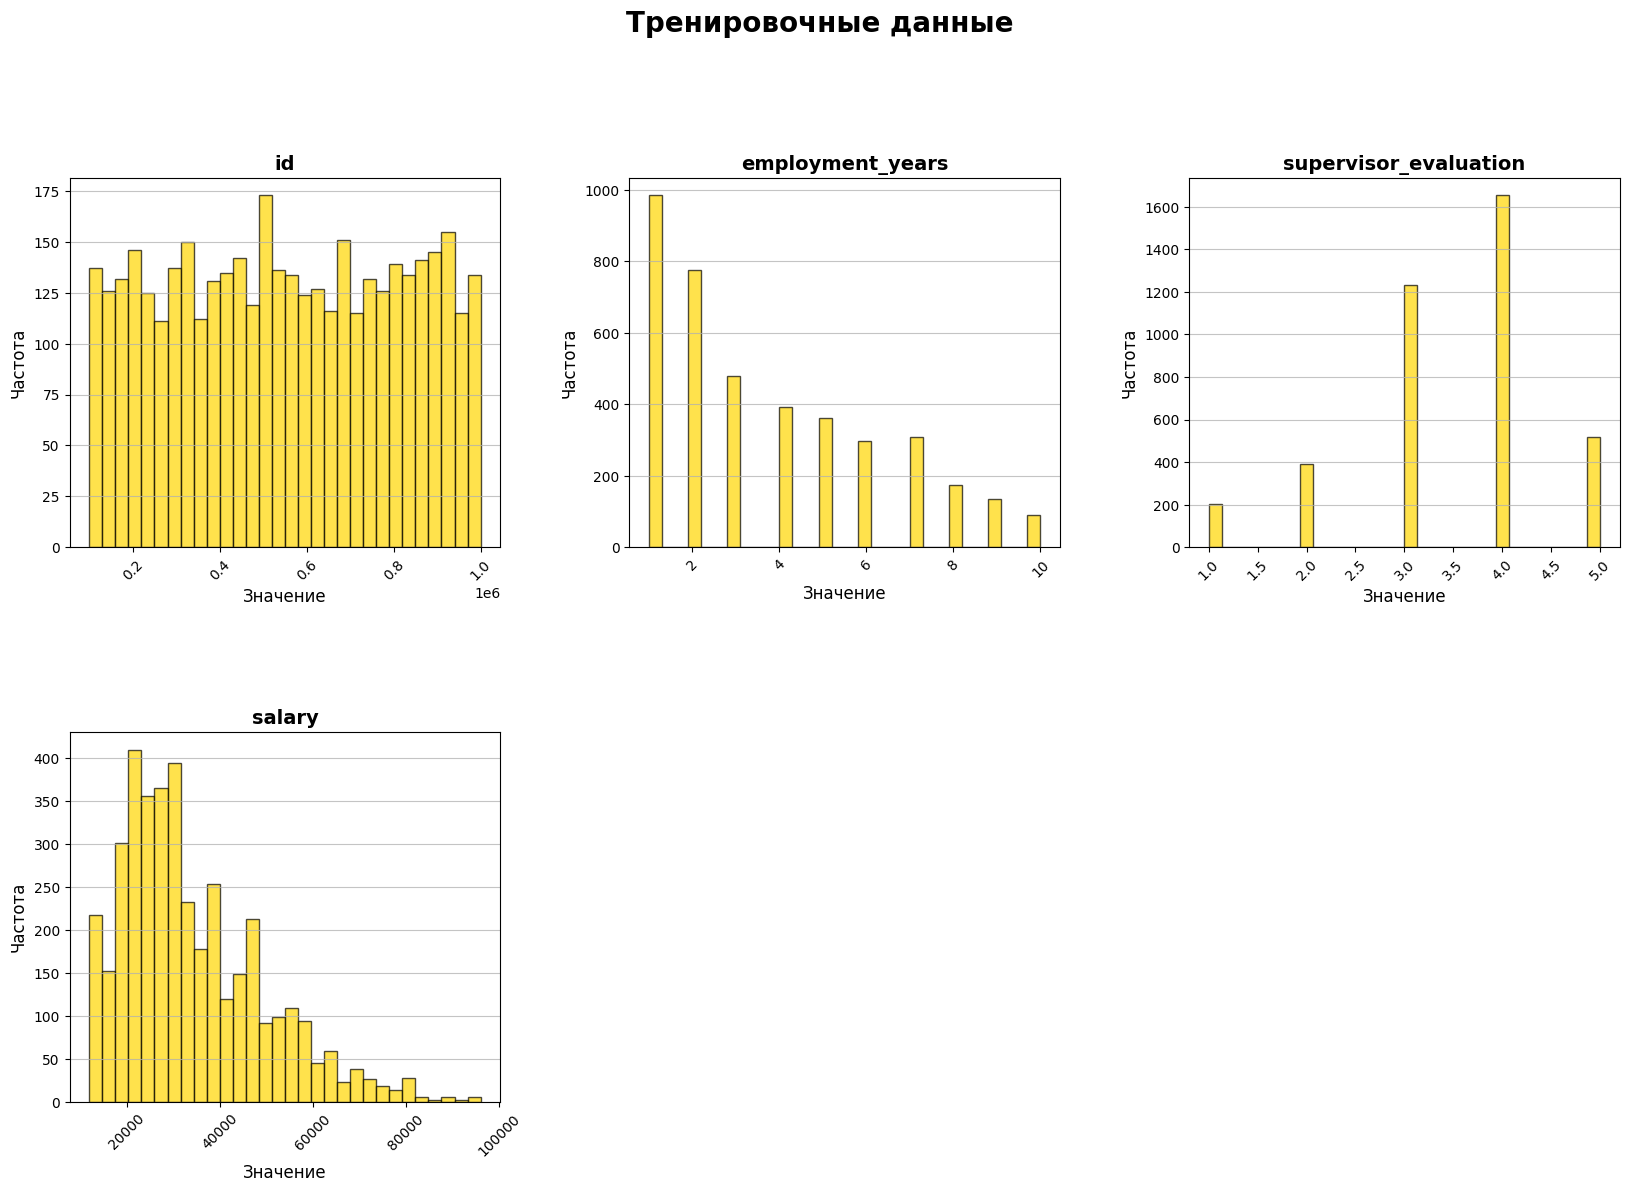

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

id  employment_years  supervisor_evaluation        salary
count    2000.000000       2000.000000            2000.000000   2000.000000
mean   552765.213500          3.666500               3.526500  34066.800000
std    253851.326129          2.537222               0.996892  15398.436729
min    100298.000000          1.000000               1.000000  12000.000000
25%    339052.000000          1.000000               3.000000  22800.000000
50%    550793.000000          3.000000               4.000000  30000.000000
75%    765763.750000          6.000000               4.000000  43200.000000
max    999029.000000         10.000000               5.000000  96000.000000

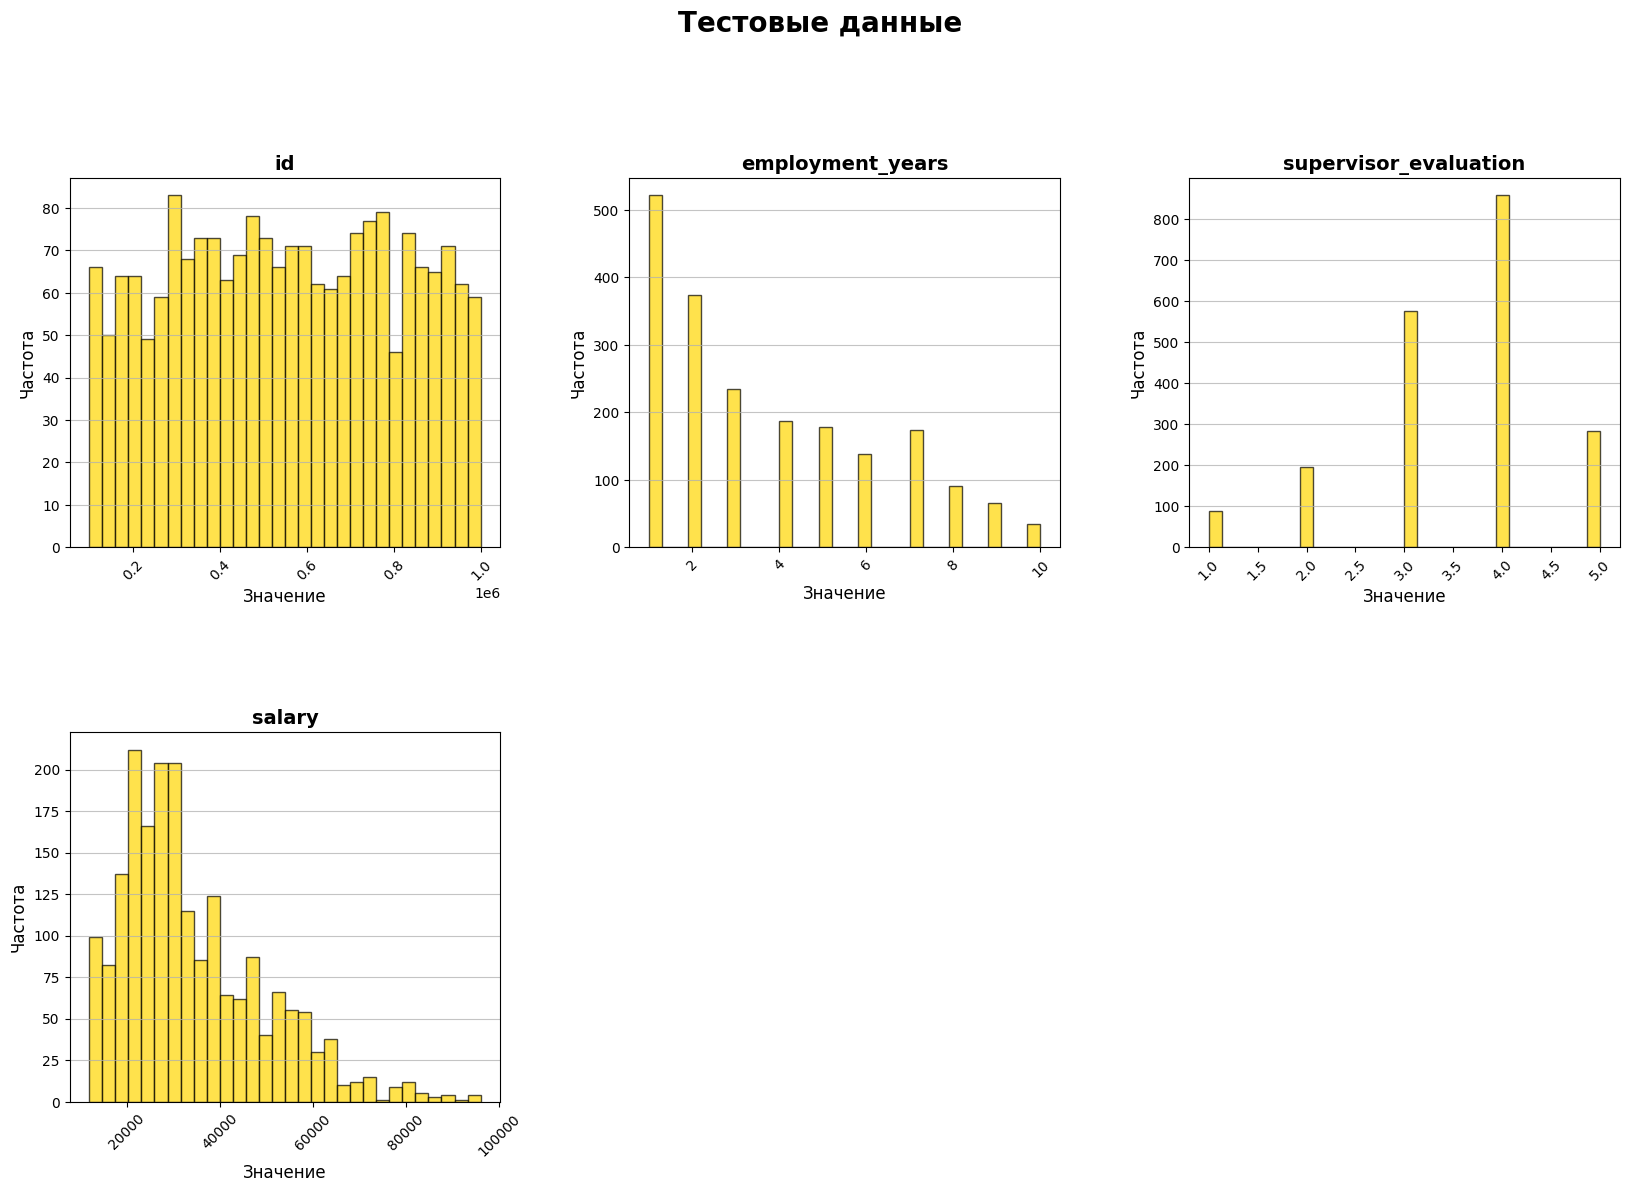

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

id quit
0  999029  yes
1  372846   no
2  726767   no
3  490105   no
4  416898  yes

id
count    2000.000000
mean   552765.213500
std    253851.326129
min    100298.000000
25%    339052.000000
50%    550793.000000
75%    765763.750000
max    999029.000000

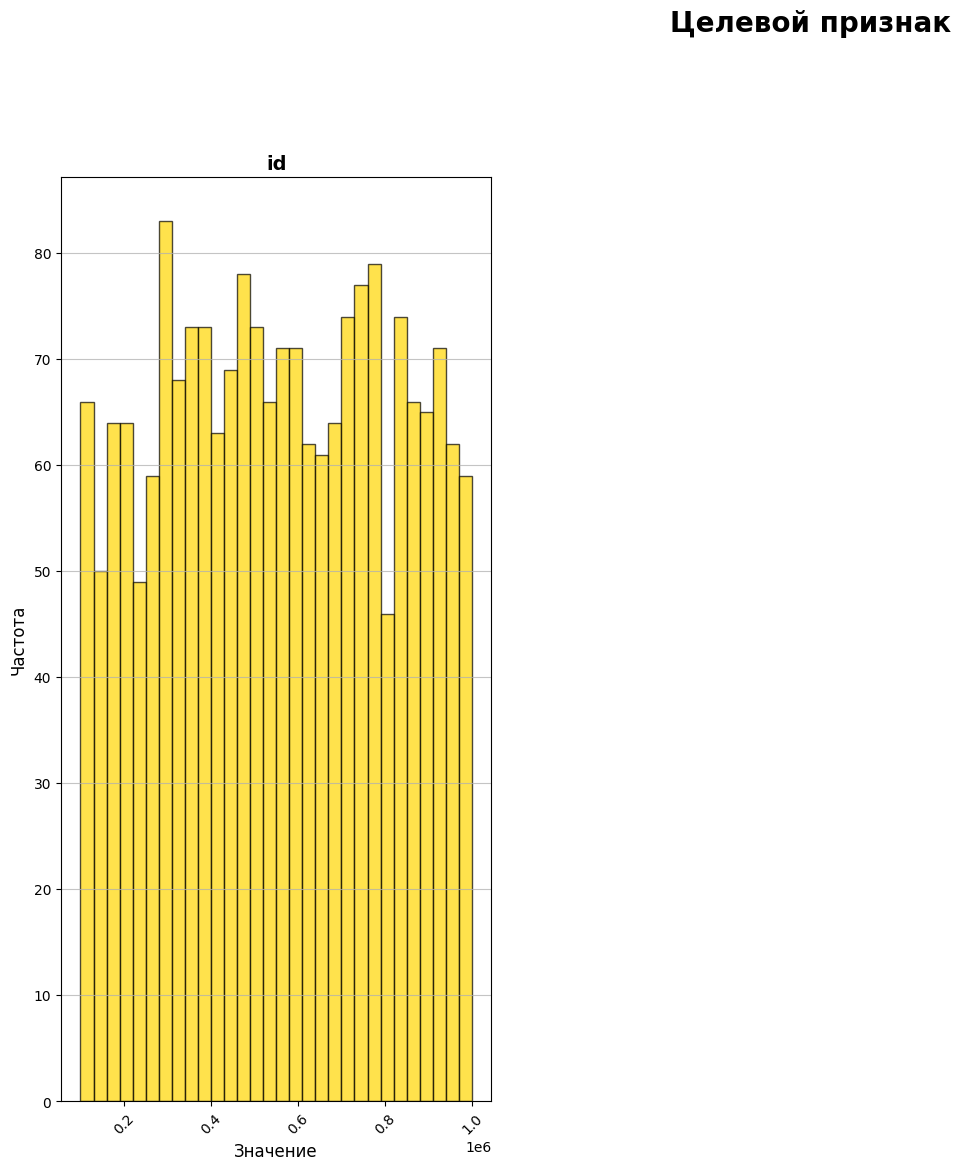

In [55]:
check_df(train_quit, 'Тренировочные данные')
check_df(X_test_quit, 'Тестовые данные')
check_df(y_test_quit, 'Целевой признак')

### Вывод по изучению данных

**Данные о сотрудниках (тренировочная выборка)**

1. **Структура данных**:
   - В датафрейме содержится 4000 записей и 10 столбцов:
     - `id`: уникальный идентификатор сотрудника (тип данных: int64).
     - `dept`: отдел, в котором работает сотрудник (тип данных: object, все 4000 ненулевых значений).
     - `level`: уровень занимаемой должности (тип данных: object, все 4000 ненулевых значений).
     - `workload`: уровень загруженности (тип данных: object, все 4000 ненулевых значений).
     - `employment_years`: длительность работы в компании в годах (тип данных: int64, все 4000 ненулевых значений).
     - `last_year_promo`: было ли повышение за последний год (тип данных: object, все 4000 ненулевых значений).
     - `last_year_violations`: нарушал ли сотрудник трудовой договор за последний год (тип данных: object, все 4000 ненулевых значений).
     - `supervisor_evaluation`: оценка качества работы сотрудника (тип данных: int64, все 4000 ненулевых значений).
     - `salary`: ежемесячная зарплата сотрудника (тип данных: int64, все 4000 ненулевых значений).
     - `quit`: целевой признак, указывающий на увольнение сотрудника (тип данных: object, все 4000 ненулевых значений).

2. **Статистические характеристики**:
   - `employment_years`:
     - Среднее значение: 3.70 года
     - Стандартное отклонение: 2.54 года
     - Минимальное значение: 1 год
     - Максимальное значение: 10 лет
   - `supervisor_evaluation`:
     - Среднее значение: 3.70 (по шкале от 1 до 10)
     - Стандартное отклонение: 1.00
   - `salary`:
     - Средняя зарплата: 33805.80
     - Стандартное отклонение: 15152.42
     - Минимальная зарплата: 12000
     - Максимальная зарплата: 96000

**Данные о тестовой выборке**

1. **Структура данных**:
   - В тестовом датафрейме содержится 2000 записей и 9 столбцов:
     - `id`: уникальный идентификатор сотрудника (тип данных: int64).
     - `dept`: отдел (тип данных: object, 1998 ненулевых значений).
     - `level`: уровень должности (тип данных: object, 1999 ненулевых значений).
     - `workload`: уровень загруженности (тип данных: object, все 2000 ненулевых значений).
     - `employment_years`: длительность работы в компании в годах (тип данных: int64, все 2000 ненулевых значений).
     - `last_year_promo`: повышение за последний год (тип данных: object, все 2000 ненулевых значений).
     - `last_year_violations`: нарушения за последний год (тип данных: object, все 2000 ненулевых значений).
     - `supervisor_evaluation`: оценка работы сотрудника (тип данных: int64, все 2000 ненулевых значений).
     - `salary`: ежемесячная зарплата (тип данных: int64, все 2000 ненулевых значений).

2. **Статистические характеристики**:
   - `employment_years`:
     - Среднее значение: 3.67 года
     - Стандартное отклонение: 2.54 года
     - Минимальное значение: 1 год
     - Максимальное значение: 10 лет
   - `supervisor_evaluation`:
     - Среднее значение: 3.67
     - Стандартное отклонение: 1.00
   - `salary`:
     - Средняя зарплата: 34066.80
     - Стандартное отклонение: 15398.44
     - Минимальная зарплата: 12000
     - Максимальная зарплата: 96000

**Проблемы и недостатки данных**

1. **Пропуски**:
   - В тестовом датафрейме столбцы `dept` и `level` имеют пропуски (2 и 1 соответственно), что потребует обработки перед обучением модели.

2. **Тип данных**:
   - Категориальные признаки (например, `dept`, `level`, `workload`, `last_year_promo`, `last_year_violations`) необходимо закодировать.

3. **Статистические характеристики**:
   - Заметные различия в зарплатах и оценках могут свидетельствовать о наличии выбросов, что также стоит учесть в процессе анализа.

**Рекомендации**

- Обработать пропуски в столбцах `dept` и `level`, например, с использованием наиболее частых значений или других методов.
- Кодировать категориальные признаки с использованием методов, таких как OneHotEncoder или OrdinalEncoder.
- Провести дополнительный анализ на наличие выбросов и аномалий в данных, что может повлиять на качество моделей и их предсказания.

## Предобработка данных

### Обработка пропусков и дубликатов

#### Обработка неявных дубликатов

In [56]:
display_value_counts(train_quit, [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations'
])

dept
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: count, dtype: int64

level
junior    1949
middle    1694
sinior     357
Name: count, dtype: int64

workload
medium    2118
low       1208
high       674
Name: count, dtype: int64

last_year_promo
no     3887
yes     113
Name: count, dtype: int64

last_year_violations
no     3455
yes     545
Name: count, dtype: int64


----------------------------


Неявных дубликатов нет. Также как и в задаче 1, присуствует ошибка в слове. 

In [57]:
analyze_dataframe(train_quit, 'train_quit')

Анализ: train_quit
Количество пропусков в каждом столбце:
id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64
Дубликаты: 0



В тренировочных данных нет пропусков и дубликатов.

### Обработка столбца id

In [58]:
# установка столбца id в качестве индекса
train_quit.set_index('id', inplace=True)

# сброс индекса и приведение его к значениям, начинающимся с 0
train_quit.reset_index(drop=True, inplace=True)

train_quit.head()

dept   level workload  employment_years last_year_promo  \
0       sales  middle     high                 2              no   
1       sales  junior   medium                 2              no   
2  purchasing  middle   medium                 5              no   
3       sales  junior   medium                 2              no   
4   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no

### Вывод по предобработке данных

1. **Обработка дубликатов и пропусков**

  - **Анализ пропусков и дубликатов**:
  - Анализ данных показал, что пропусков нет
  - Явные и неявные дубликаты отсутствуют.

2. **Обработка ненужных данных**
  - Значения в столбце `id` были преобразованы в id.

## Исследовательский анализ данных

### Количественные признаки

In [59]:
train_quit.describe()

employment_years  supervisor_evaluation        salary
count       4000.000000            4000.000000   4000.000000
mean           3.701500               3.474750  33805.800000
std            2.541852               1.004049  15152.415163
min            1.000000               1.000000  12000.000000
25%            2.000000               3.000000  22800.000000
50%            3.000000               4.000000  30000.000000
75%            6.000000               4.000000  43200.000000
max           10.000000               5.000000  96000.000000

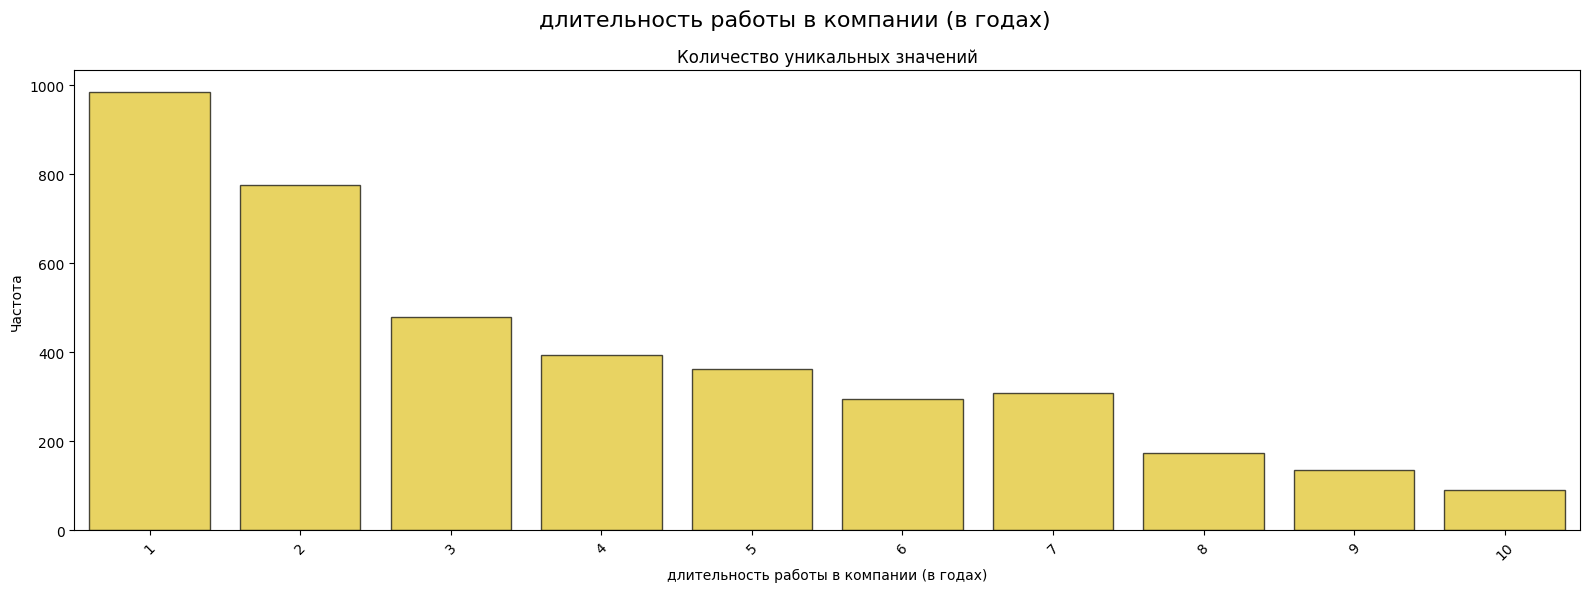

In [60]:
hist_box_df(train_quit, 'employment_years', 'длительность работы в компании (в годах)')

- Распределения нет - явный убывающий тренд.
- Выбросов нет.

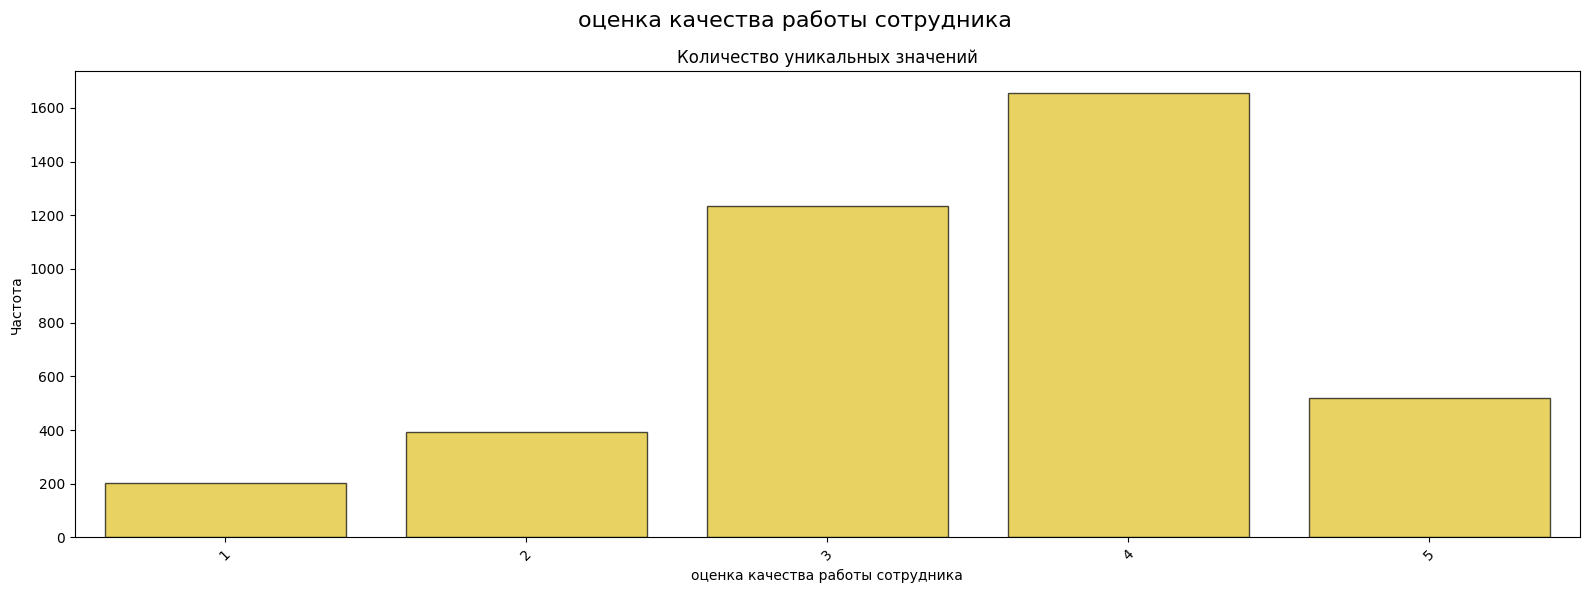

In [61]:
hist_box_df(train_quit, 'supervisor_evaluation', 'оценка качества работы сотрудника')

- Распределение похоже на нормальное, но с небольшим смещением вправо.
- Есть выбросы на значении 1, проверим.

In [62]:
train_quit.query('supervisor_evaluation == 1')

dept   level workload  employment_years last_year_promo  \
2     purchasing  middle   medium                 5              no   
13     marketing  middle   medium                 3             yes   
50         sales  junior   medium                 2              no   
58    purchasing  junior   medium                 2              no   
79         sales  junior   medium                 4              no   
...          ...     ...      ...               ...             ...   
3877   marketing  middle   medium                 3              no   
3884  technology  junior   medium                 2              no   
3921   marketing  junior   medium                 1              no   
3934       sales  junior      low                 2              no   
3968       sales  junior   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary quit  
2                      no                      1   37200   no  
13                    yes                      1   44400   no  
50                     no                      1   24000   no  
58                    yes                      1   24000  yes  
79                     no                      1   24000   no  
...                   ...                    ...     ...  ...  
3877                  yes                      1   34800   no  
3884                   no                      1   26400  yes  
3921                   no                      1   22800   no  
3934                   no                      1   12000  yes  
3968                   no                      1   20400  yes  

[202 rows x 9 columns]

- Аналогично заданию 1

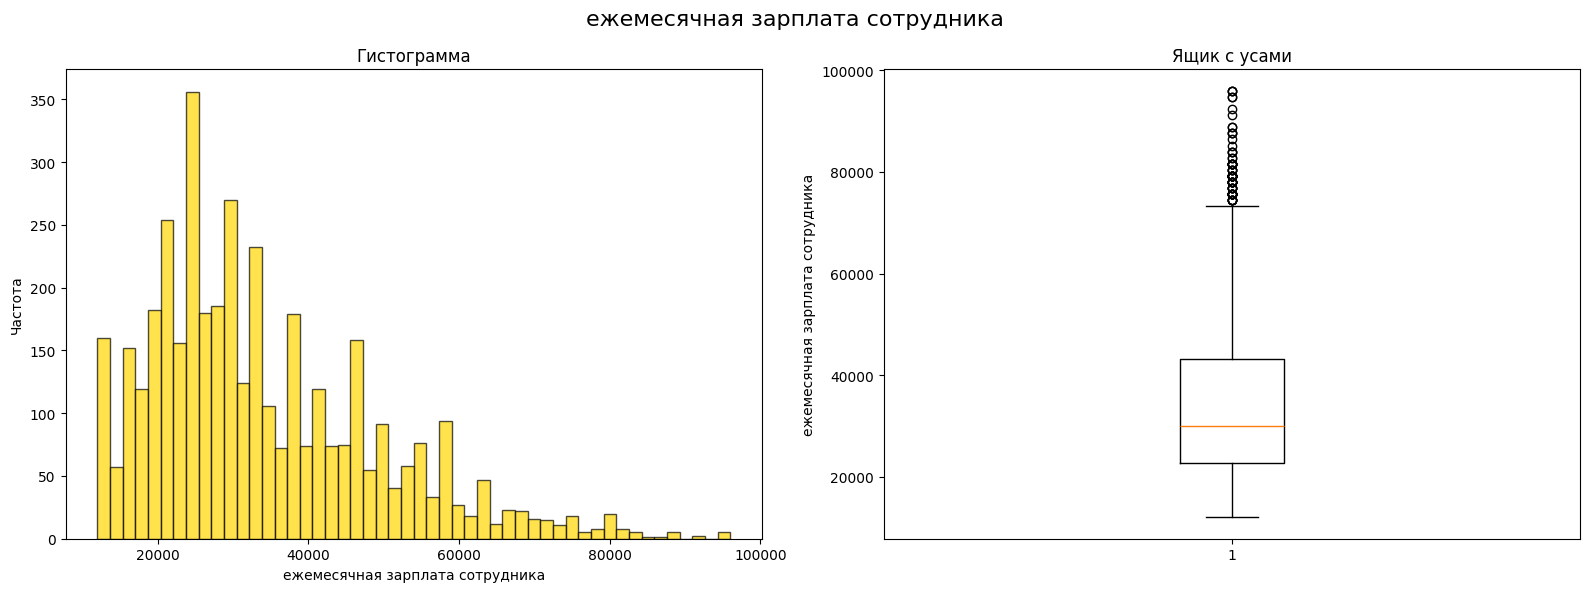

In [63]:
hist_box_df(train_quit, 'salary', 'ежемесячная зарплата сотрудника')

- Распределение не похоже на нормальное (есть смещение влево, присутсвует ассимметрия, напоминает горку, в данных большое количество вариаций, от чего на графике гистограмме много пиков)
- Выбросы на значениях более 75000 единиц.

In [64]:
train_quit.query('salary >= 75000')

dept   level workload  employment_years last_year_promo  \
16    technology  sinior     high                 5             yes   
100        sales  sinior     high                 7              no   
179   technology  sinior     high                 7              no   
185   technology  sinior     high                 1              no   
198        sales  sinior     high                 5              no   
...          ...     ...      ...               ...             ...   
3751  technology  sinior     high                 7              no   
3783   marketing  sinior     high                 8              no   
3831  technology  sinior     high                 1              no   
3945  purchasing  sinior     high                 6              no   
3982  technology  sinior     high                 4              no   

     last_year_violations  supervisor_evaluation  salary quit  
16                     no                      3   82800   no  
100                   yes                      3   78000   no  
179                    no                      3   94800   no  
185                    no                      4   96000   no  
198                    no                      4   79200   no  
...                   ...                    ...     ...  ...  
3751                   no                      5   87600   no  
3783                  yes                      3   75600   no  
3831                   no                      3   92400   no  
3945                   no                      5   81600   no  
3982                   no                      3   87600   no  

[72 rows x 9 columns]

- Аналогично заданию 1

### Категориальнные признаки

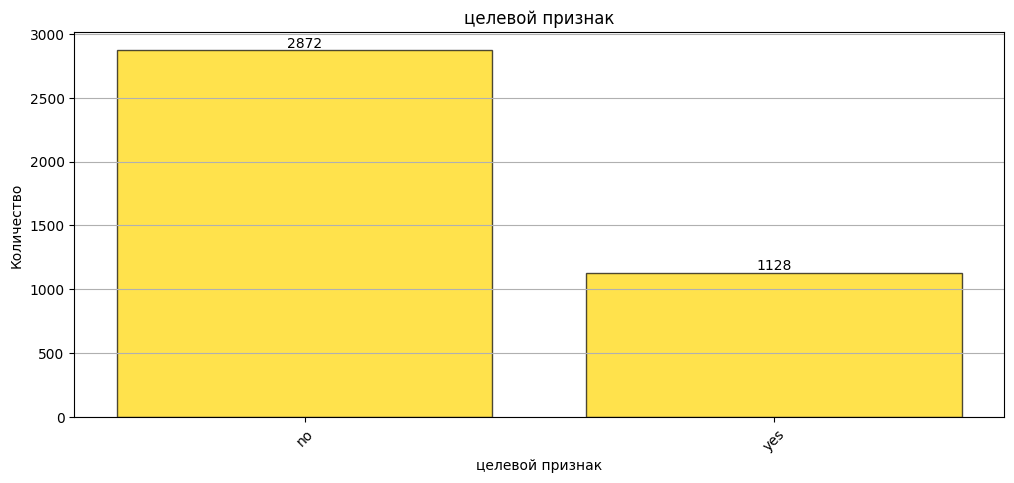

In [65]:
bar_plotter(train_quit, 'quit', 'целевой признак')

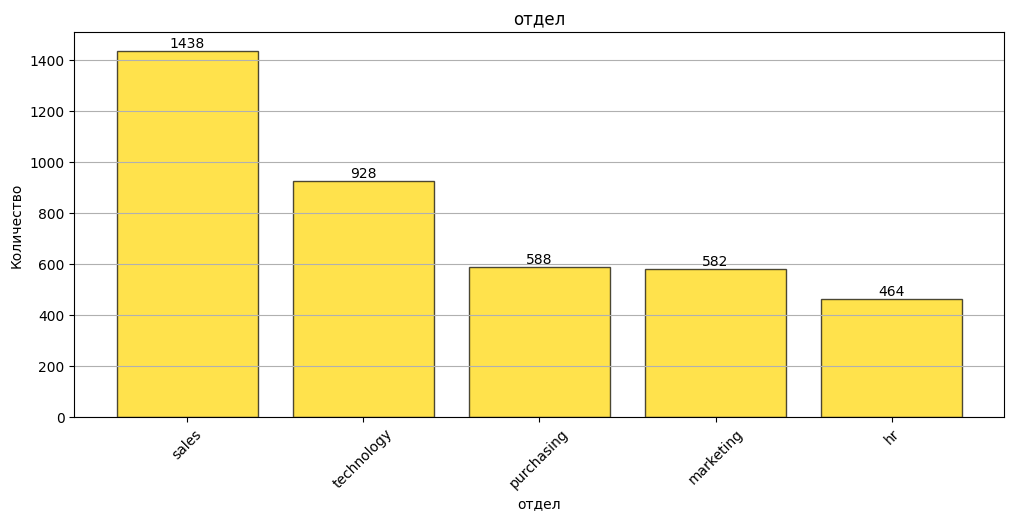

In [66]:
bar_plotter(train_quit, 'dept', 'отдел')

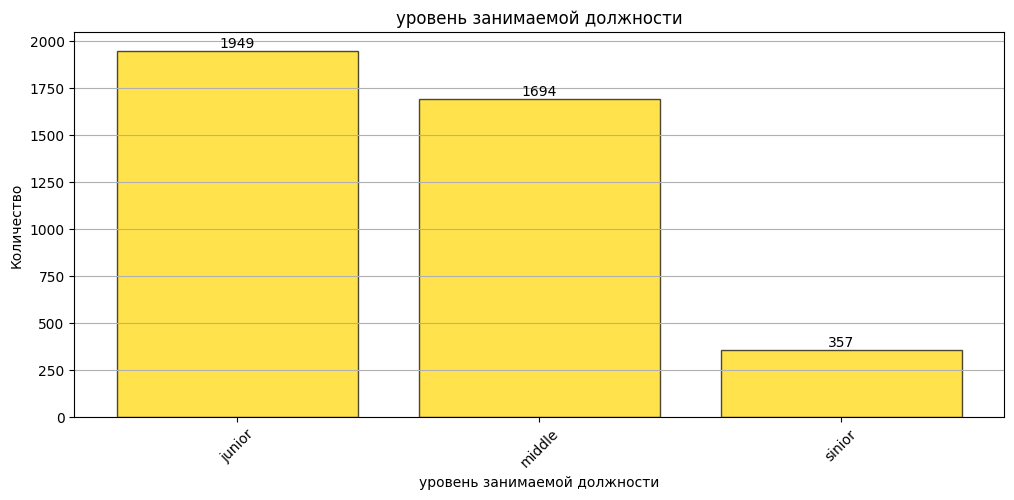

In [67]:
bar_plotter(train_quit, 'level', 'уровень занимаемой должности')

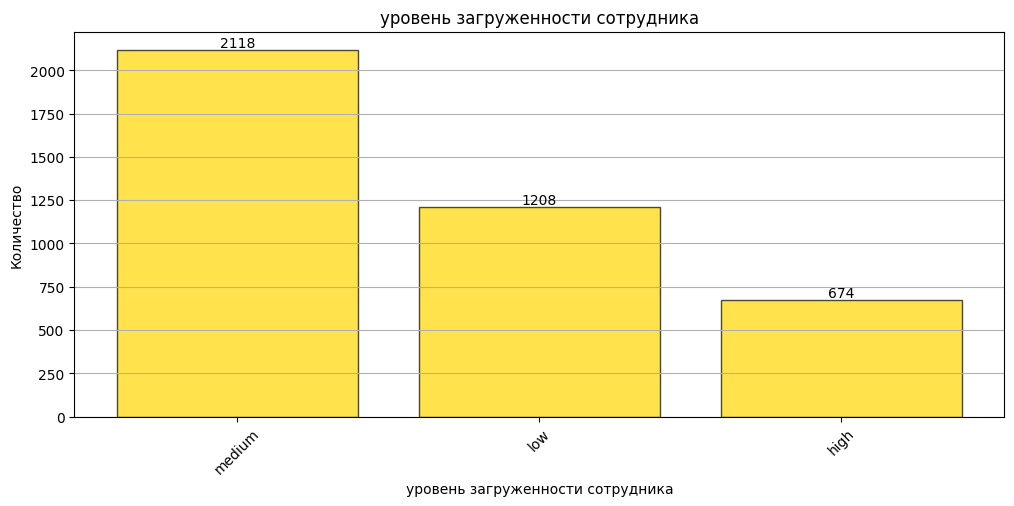

In [68]:
bar_plotter(train_quit, 'workload', 'уровень загруженности сотрудника')

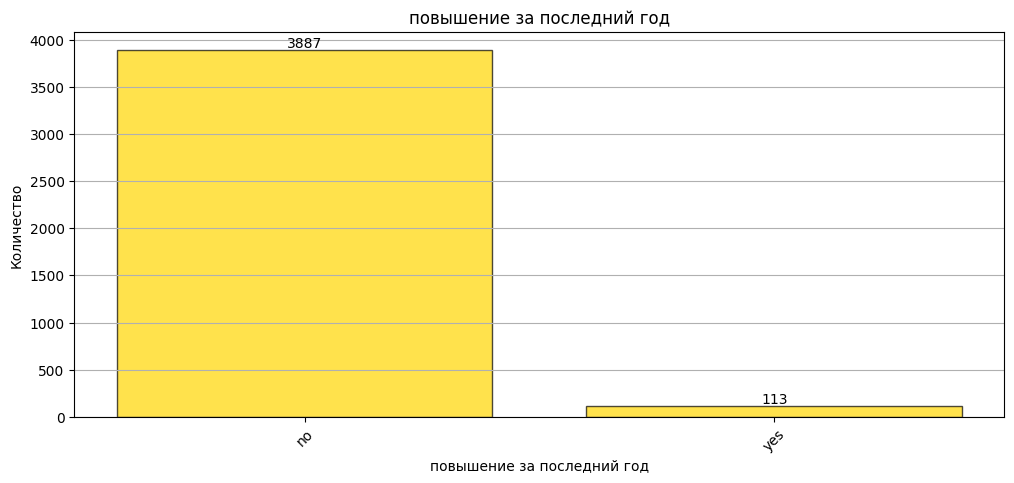

In [69]:
bar_plotter(train_quit, 'last_year_promo', 'повышение за последний год')

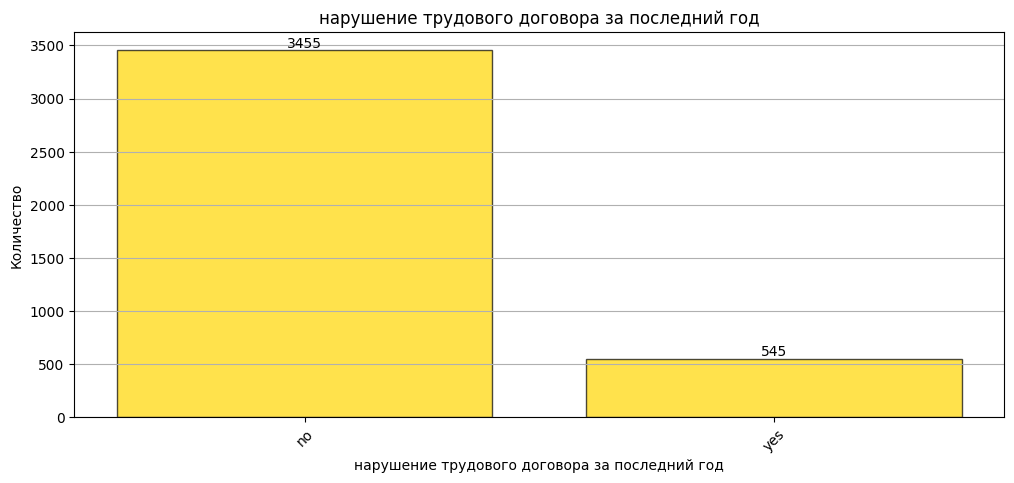

In [70]:
bar_plotter(train_quit, 'last_year_violations', 'нарушение трудового договора за последний год')

- Все значения практически не отличаются от данных из задания 1, все выводы будут аналогичны.

#### Портрет "уволившегося сотрудника"

In [71]:
# распределение увольнений по отделам
dept_quit_pivot = train_quit.pivot_table(
    index='dept',
    columns='quit',
    aggfunc='size',
)

# добавление столбца с долей уволившихся сотрудников
dept_quit_pivot['quit_ratio'] = (dept_quit_pivot['yes']
                                / (dept_quit_pivot['yes']
                                + dept_quit_pivot['no']))

dept_quit_pivot

quit          no  yes  quit_ratio
dept                             
hr           348  116    0.250000
marketing    419  163    0.280069
purchasing   422  166    0.282313
sales       1031  407    0.283032
technology   652  276    0.297414

1. **Общий уровень увольнений**:
   - В отделах наблюдается значительное количество уволившихся сотрудников. Среди всех упомянутых отделов, наибольшее количество уволившихся сотрудников зафиксировано в отделе **продаж** (407 человек), что составляет 28.3% от общего числа сотрудников этого отдела.

2. **Доля уволившихся по отделам**:
   - **Отдел HR** имеет наименьшую долю уволившихся сотрудников (25.0%). Это может свидетельствовать о стабильности в данном отделе или о высоком уровне удовлетворенности сотрудников.
   - **Отдел технологий** имеет одну из самых высоких долей уволившихся (29.7%), что может указывать на проблемы в управлении, невостребованные навыки или высокую конкурентоспособность на рынке труда, что приводит к более высокому уровню текучести кадров.
   - **Маркетинг** и **закупки** также показывают значительные уровни увольнений с долями 28.0% и 28.2% соответственно, что может указывать на необходимость анализа условий труда и мотивации сотрудников.

3. **Сравнение между отделами**:
   - Отделы с наибольшей текучестью кадров (технологии, продажи и закупки) могут потребовать дополнительных исследований для выявления причин увольнений и возможности их снижения.
   - Важно также обратить внимание на отделы с низким уровнем увольнений (например, HR) и изучить, какие методы и практики они применяют для повышения удовлетворенности сотрудников.

4. **Рекомендации**:
   - Рекомендуется провести детальный анализ причин увольнений в отделах с высокой текучестью кадров.
   - Следует рассмотреть возможность улучшения условий работы и повышения уровня вовлеченности сотрудников в тех отделах, где наблюдается высокая доля уволившихся.
   - Также полезно провести опросы удовлетворенности среди сотрудников, чтобы выявить потенциальные проблемы и возможности для улучшения.

In [72]:
# распределение увольнений по уровню загруженности
workload_quit_pivot = train_quit.pivot_table(
    index='workload',
    columns='quit',
    aggfunc='size',
)

# добавление столбца с долей уволившихся сотрудников
workload_quit_pivot['quit_ratio'] = (workload_quit_pivot['yes'] 
                                    / (workload_quit_pivot['yes'] 
                                    + workload_quit_pivot['no']))

workload_quit_pivot

quit        no  yes  quit_ratio
workload                       
high       553  121    0.179525
low        689  519    0.429636
medium    1630  488    0.230406

1. **Общий уровень увольнений по рабочей нагрузке**:
   - Из полученных данных видно, что уровень увольнений варьируется в зависимости от рабочей нагрузки. Наивысшая доля уволившихся сотрудников наблюдается в группе с **низкой рабочей нагрузкой** (42.96%), что может указывать на недостаток мотивации или вовлеченности среди сотрудников с менее напряженной работой, а может легкая работа - это просто скучные и нудные проекты, на которыми не хотят работать.

2. **Доля уволившихся по категориям рабочей нагрузки**:
   - **Высокая рабочая нагрузка** имеет наименьший уровень увольнений (17.95%), что может свидетельствовать о том, что сотрудники, работающие в условиях высокой нагрузки, более преданы своей работе или имеют более высокую степень удовлетворенности.
   - **Средняя рабочая нагрузка** показывает долю уволившихся в 23.04%, что находится между высокими и низкими уровнями, но также требует внимания к причинам увольнений.

3. **Сравнение между уровнями нагрузки**:
   - Важно отметить, что сотрудники с низкой рабочей нагрузкой имеют более чем в два раза большую вероятность увольнения по сравнению с теми, кто работает с высокой нагрузкой. Это может быть связано с недостатком вызовов и возможностей для профессионального роста.
   - Высокая рабочая нагрузка может служить индикатором того, что сотрудники ценят свою работу и готовы оставаться в компании, несмотря на стресс и требования.

4. **Рекомендации**:
   - Необходимо провести дополнительные исследования для понимания причин высокой текучести кадров в группе с низкой рабочей нагрузкой.
   - Рассмотреть возможность улучшения мотивации и вовлеченности сотрудников в низконагруженных должностях, возможно, путем внедрения новых проектов или предоставления дополнительных возможностей для профессионального роста.
   - Также стоит обратить внимание на стратегии удержания сотрудников с высокой рабочей нагрузкой, чтобы предотвратить потенциальное выгорание и текучесть в будущем.

In [73]:
# сравнение средней зарплаты уволившихся и оставшихся сотрудников
mean_salary_quit_pivot = train_quit.pivot_table(
    index='quit',
    values='salary',
    aggfunc='mean'
).T

mean_salary_quit_pivot

quit              no           yes
salary  37702.228412  23885.106383

1. **Сравнение средней зарплаты**:
   - Средняя зарплата оставшихся сотрудников (no) составляет **37,702.23** единиц, что значительно выше, чем средняя зарплата уволившихся сотрудников (yes), которая составляет **23,885.11** единиц.

2. **Анализ данных**:
   - Разница в средней зарплате между оставшимися и уволившимися сотрудниками составляет **13,817.12** единиц. Это может указывать на то, что сотрудники с более низкой зарплатой чаще принимают решение об увольнении, что может быть связано с недостаточной мотивацией или неудовлетворенностью условиями труда.
   - Высокая средняя зарплата оставшихся сотрудников может свидетельствовать о том, что компания удерживает более квалифицированных и опытных специалистов, что может быть положительным знаком для организации.

3. **Рекомендации**:
   - Рекомендуется провести анализ причин увольнений среди сотрудников с низкой зарплатой, чтобы выявить возможные проблемы, связанные с условиями труда, карьерными возможностями или корпоративной культурой.
   - Следует рассмотреть возможность увеличения компенсаций для сотрудников с низкой зарплатой, чтобы повысить их удовлетворенность и снизить текучесть кадров.
   - Также полезно исследовать, какие факторы способствуют высокому уровню удовлетворенности оставшихся сотрудников, чтобы использовать эти данные для улучшения условий работы в компании.

**Таким образом, портерет уволившегося сотрудника выглядит так:**

- Низкая рабочая нагрузка;
- Работает в отделе продаж или технологий;
- Средняя зарплата составляет 23.885

#### Визуализация уровня удовлетворенности

In [74]:
# объединие целевых признаков в одну таблицу
targets = y_test_job.merge(y_test_quit, on='id', how='left')
targets

id  job_satisfaction_rate quit
0     130604                   0.74   no
1     825977                   0.75   no
2     418490                   0.60  yes
3     555320                   0.72   no
4     826430                   0.08  yes
...      ...                    ...  ...
1995  405257                   0.28   no
1996  370925                   0.21  yes
1997  857722                   0.39   no
1998  303402                   0.26  yes
1999  648995                   0.62   no

[2000 rows x 3 columns]

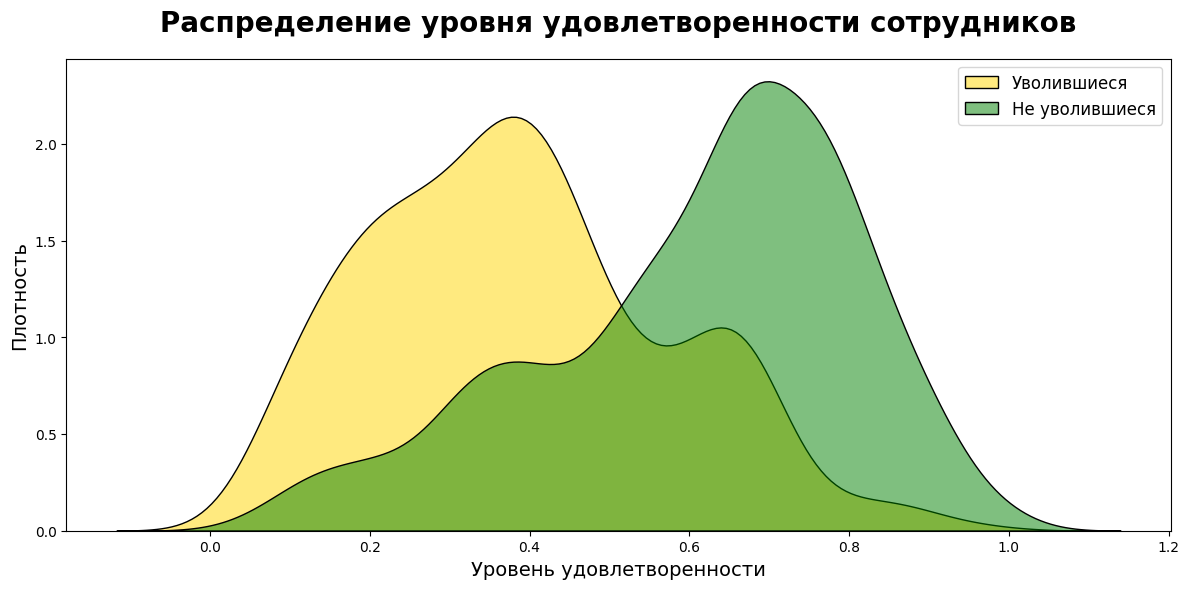

In [75]:
# визуализация распределения уровня удовлетворенности для уволившихся и оставшихся сотрудников
plt.figure(figsize=(12, 6))
sns.kdeplot(targets[targets['quit'] == 'yes']['job_satisfaction_rate'], 
            label='Уволившиеся', fill=True, color='gold', alpha=0.5, edgecolor='black')

sns.kdeplot(targets[targets['quit'] == 'no']['job_satisfaction_rate'], 
            label='Не уволившиеся', fill=True, color='green', alpha=0.5, edgecolor='black')

plt.title('Распределение уровня удовлетворенности сотрудников', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Уровень удовлетворенности', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

- Если посмотреть на полученный график и провести воображаемую линию от пиков распределений к значениям уровней удовлетворенности, можно сделать вывод, что эти пики распределений находятся на совершенно разных уровнях удовлетворенности.
- Наибольшее количество уволившехся сотрудников соответсвуют показателю удовлетворенности 0.4, в то время, как показатель удовлетворенности не уволившехся сотрудников соответсвует 0.7, а их количество больше, чем уволившехся почти на 0.5

### Вывод по исследовательскому анализу данных

1. **Исследовательский анализ данных**:
   - Показатели текущего датафрейма отличаются от данных из первого задания не более чем на 2-5%, все соотношения сохранены, поэтому выводы аналогичны выводам из пункта 1.3.3.

   - Целевой признак описан немного по-другому. Сотрудников с пометкой "да" в 2.5 раза меньше сотрудников с пометкой "нет".

2. **Общий уровень увольнений**:
   - Наиболее значительное количество уволившихся сотрудников зафиксировано в отделе продаж, что составляет 28.3% от общего числа сотрудников этого отдела. Это сигнализирует о возможных проблемах в управлении или условиях работы.
   - Отдел HR демонстрирует наименьшую долю увольнений (25.0%), что может свидетельствовать о высокой степени удовлетворенности и стабильности в этом отделе. В то же время, отдел технологий имеет одну из самых высоких долей уволившихся (29.7%), что требует дальнейшего анализа причин высокой текучести кадров.

3. **Рабочая нагрузка и увольнения**:
   - Наивысшая доля уволившихся сотрудников (42.96%) наблюдается в группе с низкой рабочей нагрузкой. Это может говорить о недостатке мотивации или скуке среди сотрудников, что приводит к их увольнению.
   - В то же время, сотрудники с высокой рабочей нагрузкой имеют наименьший уровень увольнений (17.95%), что указывает на их преданность работе и удовлетворенность условиями труда.

4. **Сравнение средней зарплаты**:
   - Средняя зарплата оставшихся сотрудников значительно выше, чем уволившихся, что может указывать на то, что сотрудники с более низкой зарплатой чаще увольняются. Это подчеркивает важность компенсаций и условий труда для удержания персонала.
   - Анализ также показывает, что компания удерживает более квалифицированных сотрудников с высокой зарплатой, что является положительным знаком.

5. **Портрет уволившегося сотрудника**:
   - Уволившийся сотрудник обычно имеет низкую рабочую нагрузку, работает в отделе продаж и имеет среднюю зарплату 23,885. Это подчеркивает необходимость обратить внимание на условия труда и мотивацию сотрудников в подобных ситуациях.

6. **Графический анализ**:
   - Визуализация распределения уровней удовлетворенности показывает, что пики уволившихся сотрудников находятся на значительно более низком уровне удовлетворенности (0.4), чем у оставшихся (0.7). Это различие в уровнях удовлетворенности может указывать на необходимость улучшения условий труда и повышения вовлеченности сотрудников.

Таким образом, для снижения уровня текучести кадров и повышения удовлетворенности сотрудников необходимо комплексное вмешательство, направленное на улучшение условий труда и мотивации.

## Корреляционный анализ данных

### Корреляционная матрица

In [76]:
train.dtypes

dept                      object
level                     object
workload                  object
employment_years           int64
last_year_promo           object
last_year_violations      object
supervisor_evaluation      int64
salary                     int64
job_satisfaction_rate    float64
dtype: object

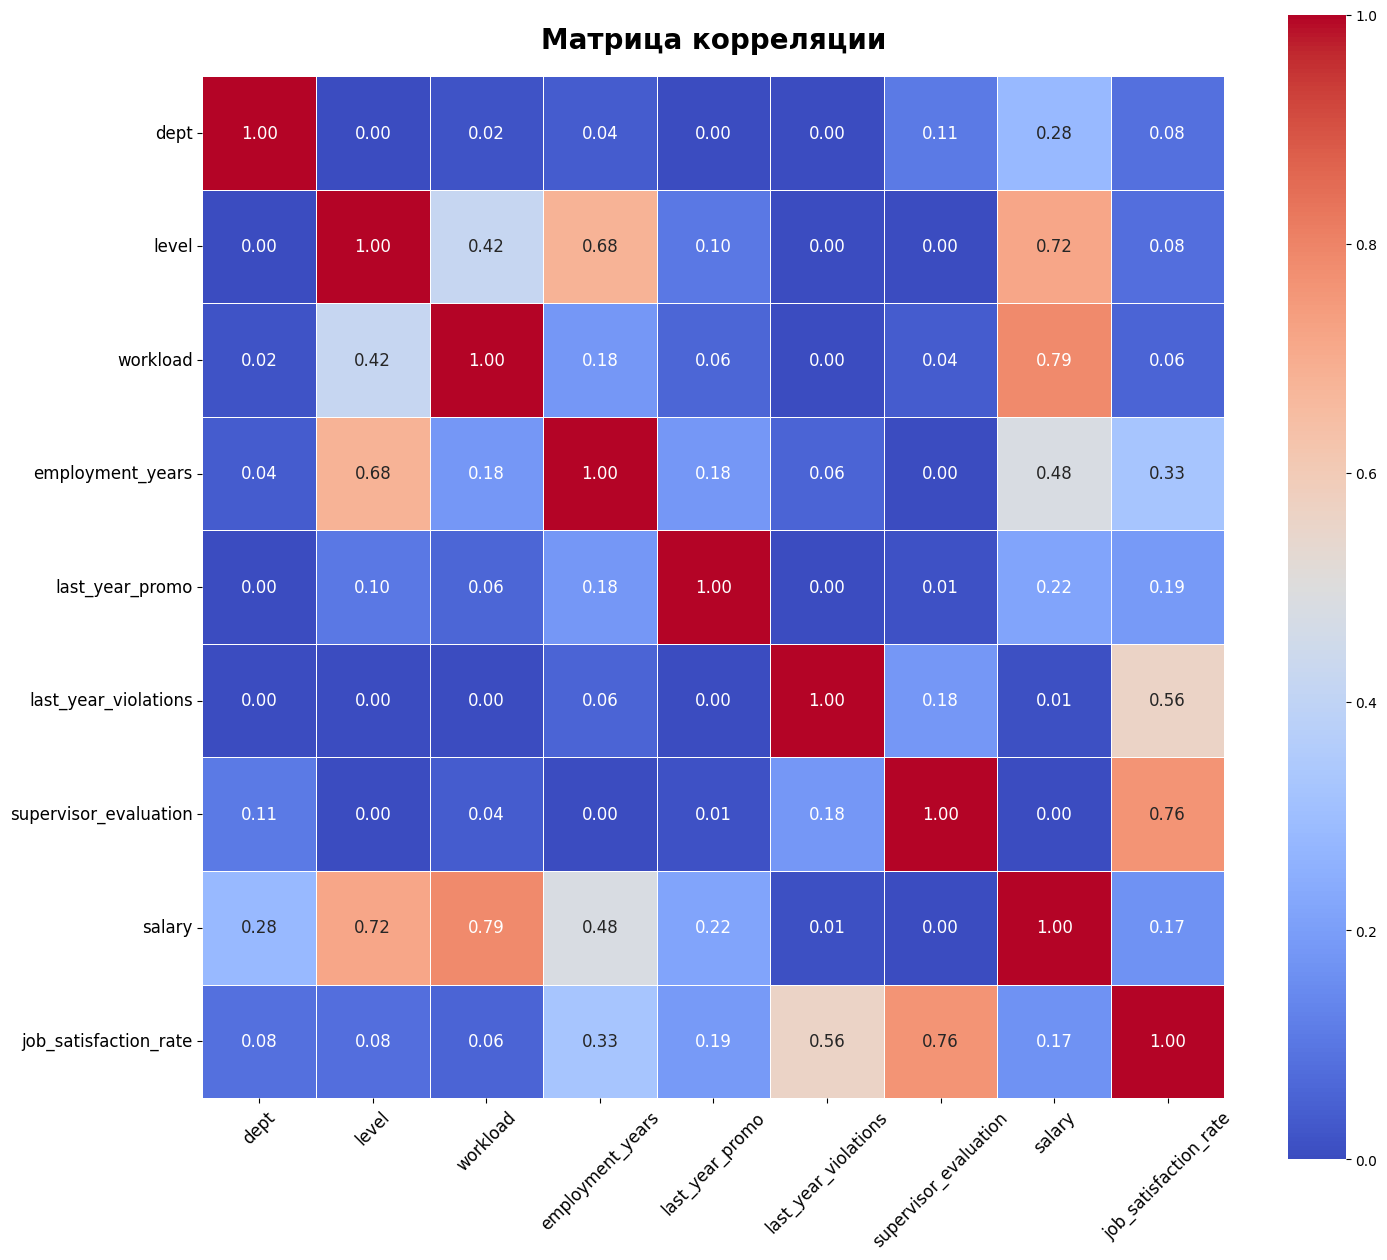

In [77]:
interval_cols = ['job_satisfaction_rate', 'salary']

corr_matrix = train.phik_matrix(interval_cols=interval_cols)


plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm', cbar_kws={"shrink": .8},
            annot_kws={"size": 12}, fmt=".2f", linewidths=.5)

plt.title('Матрица корреляции', fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Показ графика
plt.tight_layout()
plt.show()

- На новых данных показатели почти не изменились. Изменения составляют не более 5%
- Мультиколлинеарность по-прежнему не наблюдается.
- Умеренная положительна корреляция с `целевым признаком` встречается у признаков `salary`, `level` и `employment_years`. Это может свидетельствовать о том, что размер зарплаты, достигнутый уровень профессионализма и выслуга лет значительно влияют на вероятность увольнения сотрудника.

### График зависимости признаков

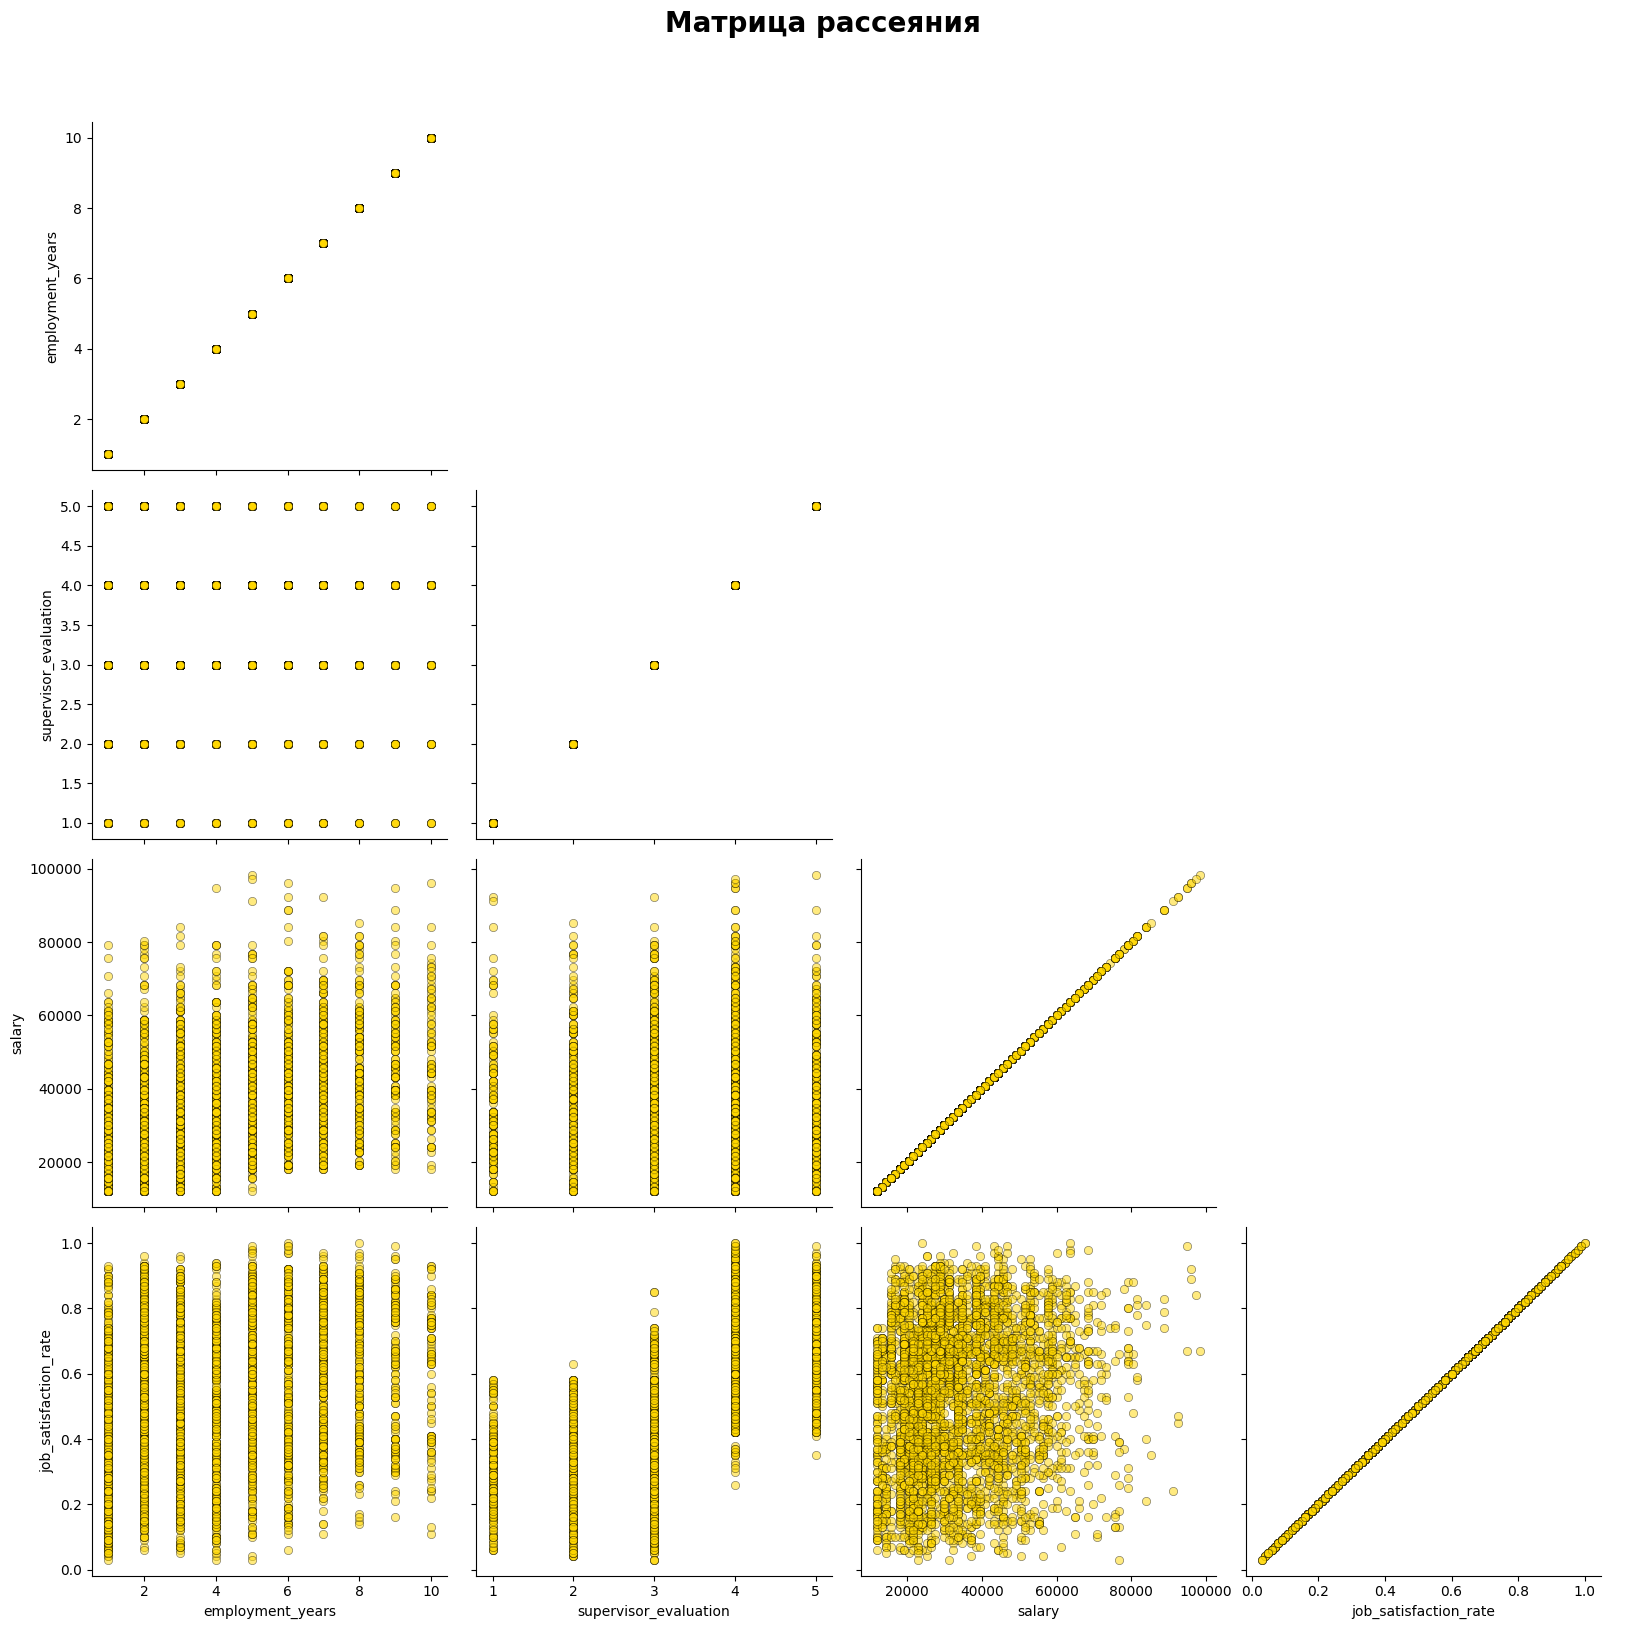

In [78]:
numeric_cols = train.select_dtypes(include=['number']).columns.tolist()

relation_corr = sns.PairGrid(train[numeric_cols], diag_sharey=False, corner=True, height=4)

relation_corr.map(sns.scatterplot, color='gold', edgecolor='black', alpha=0.5)

relation_corr.add_legend()

plt.suptitle('Матрица рассеяния', fontsize=20, fontweight='bold', y=1.02)  # Заголовок графика
plt.subplots_adjust(top=0.95)  # Поднимаем заголовок графика
plt.show()

- Между признаками зависимость почти не наблюдается. Можно заметить слабую нелинейную зависимость между `employment_years` и `salary`.

### Вывод по корреляционному анализу данных

Корреляционный анализ данных выявил несколько важных аспектов взаимосвязей между признаками и целевым признаком. 

1. **Корреляционная матрица**: 
   - Вычисленная с помощью метода `phik_matrix()`, показала умеренную положительную корреляцию признаков:
     - `salary`
     - `level`
     - `employment_years`
   - Эти результаты указывают на то, что размер зарплаты, достигнутый уровень профессионализма и выслуга лет могут существенно влиять на вероятность увольнения сотрудников.

2. **Стабильность данных**:
   - На новых данных изменения в показателях составляют не более 5%.
   - Мультиколлинеарность между признаками не наблюдается, что является положительным фактором для построения модели.

3. **Визуализация зависимостей**:
   - Использование `PairGrid` показало, что зависимостей между большинством признаков почти не наблюдается.
   - Однако была замечена слабая нелинейная зависимость между `employment_years` и `salary`, что может потребовать дополнительного анализа и изучения.

## Добавление нового входного признака

In [79]:
train_quit['job_satisfaction_rate'] = dtr_grid.best_estimator_.predict(train_quit.drop(['quit'], axis=1))
train_quit.head()

dept   level workload  employment_years last_year_promo  \
0       sales  middle     high                 2              no   
1       sales  junior   medium                 2              no   
2  purchasing  middle   medium                 5              no   
3       sales  junior   medium                 2              no   
4   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  \
0                   no                      4   54000   no   
1                   no                      4   27600   no   
2                   no                      1   37200   no   
3                  yes                      3   24000  yes   
4                   no                      5   25200   no   

   job_satisfaction_rate  
0               0.648000  
1               0.821905  
2               0.337500  
3               0.350000  
4               0.812500

### Вывод по добавлению нового входного признака

- Новый входной признак успешно предсказан и добавлены предсказанные значения в тренировочные данные.

## Подготовка данных

### Разделение данных

In [80]:
display(train_quit.head())

dept   level workload  employment_years last_year_promo  \
0       sales  middle     high                 2              no   
1       sales  junior   medium                 2              no   
2  purchasing  middle   medium                 5              no   
3       sales  junior   medium                 2              no   
4   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  \
0                   no                      4   54000   no   
1                   no                      4   27600   no   
2                   no                      1   37200   no   
3                  yes                      3   24000  yes   
4                   no                      5   25200   no   

   job_satisfaction_rate  
0               0.648000  
1               0.821905  
2               0.337500  
3               0.350000  
4               0.812500

In [81]:
le = LabelEncoder()

train_quit['quit'] = le.fit_transform(train_quit['quit'])
train_quit.head()

dept   level workload  employment_years last_year_promo  \
0       sales  middle     high                 2              no   
1       sales  junior   medium                 2              no   
2  purchasing  middle   medium                 5              no   
3       sales  junior   medium                 2              no   
4   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary  quit  \
0                   no                      4   54000     0   
1                   no                      4   27600     0   
2                   no                      1   37200     0   
3                  yes                      3   24000     1   
4                   no                      5   25200     0   

   job_satisfaction_rate  
0               0.648000  
1               0.821905  
2               0.337500  
3               0.350000  
4               0.812500

Теперь 0 соответсвует значению "no" (отрицательный класс)
1 соответсвует значению "yes" (положительный класс)

In [82]:
X_train = train_quit.drop(columns=['quit'])
y_train = train_quit['quit']

X_train.shape, y_train.shape

((4000, 9), (4000,))

In [83]:
num_columns = [
    'employment_years',
    'supervisor_evaluation', 
    'salary',
    'job_satisfaction_rate'
]

ord_columns = [
    'workload', #уровень загруженности (low, medium, high) можно считать порядковым
    'level' # уровень должности (junior, middle, senior)
]

ohe_columns = [
    'dept',
    'last_year_promo',
    'last_year_violations'
]

### Итоговые пайплайны

In [84]:
knn_pipe = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier())
])

In [85]:
dtc_pipe = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [86]:
svc_pipe = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(random_state=RANDOM_STATE))
])

In [87]:
lr_pipe = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE, solver='liblinear'))
])

### Вывод по подготовке данных

**Подготовка данных**
1. **Разделение данных**: Данные были разделены на обучающую и валидационную выборки с использованием `train_test_split`, где `X` содержит все признаки, а `y` — целевую переменную `quit`.

2. **Определение типов признаков**:
   - **Числовые признаки** (`num_columns`): `employment_years`, `supervisor_evaluation`, `salary`, `job_satisfaction_rate`.
   - **Порядковые признаки** (`ord_columns`): `workload`, `level`.
   - **Категориальные признаки** (`ohe_columns`): `dept`, `last_year_promo`, `last_year_violations`.

**Создание пайплайнов**
- Использованы пайплайны, созданные в задании 1.

**Итоговые пайплайны для моделей**
1. **Дерево решений**: Создан пайплайн `dtc_pipe`, который включает предварительную обработку и модель `DecisionTreeClassifier`.

2. **Логистическая регрессия**: Создан аналогичный пайплайн `lr_pipe` для `LinearRegression`.

3. **K-соседи**: Создан пайплайн `knn_pipe` для `KNeighborsClassifier`.

4. **Метод опорных векторов**: Создан пайплайн `svc_pipe` для `SVC`.

## Обучение моделей

In [88]:
# словарь для модели KNeighborsClassifier()
knn_params = [ 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    }]

# словарь для модели DecisionTreeClassifier()
dtc_params = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__min_samples_split': range(2, 11),
        'models__min_samples_leaf': range(2, 11),
        'models__max_depth': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }]
    
# словарь для модели SVC()
svc_params = [
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': np.arange(1, 25),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }]

# словарь для модели LogisticRegression()
lr_params = [
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')],
        'models__penalty': ['l1', 'l2'],
        'models__C': np.logspace(-3, 3, num=7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }] 

In [89]:
def find_model_grid(pipeline, params):
    grid = GridSearchCV(
        pipeline, 
        param_grid=params, 
        scoring=['roc_auc', 'accuracy', 'recall'],
        refit='roc_auc',
        cv=5,
        n_jobs=-1
    )

    # обучение модели
    grid.fit(X_train, y_train)  

    # лучшая модель
    return grid  

In [90]:
def find_model_random(pipeline, params, n_iter=100):
    random_search = RandomizedSearchCV(
        pipeline, 
        param_distributions=params, 
        n_iter=15,  # количество случайных комбинаций
        scoring=['roc_auc', 'accuracy', 'recall'],
        refit='roc_auc', 
        cv=5,
        n_jobs=-1,
        random_state=42
    )

    # обучение модели
    random_search.fit(X_train, y_train)  

    # лучшая модель
    return random_search

### Поиск лучшей модели

In [91]:
%%time
# подберем лучшие гиперпараметры и обучим на них KNEighborsClassifier
knn = find_model_grid(knn_pipe, knn_params)
knn.best_estimator_

CPU times: total: 625 ms
Wall time: 3.29 s


D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   Pipeline(steps=[('SimpleImputer',
                                                                                    SimpleImputer(strategy='most_frequent'))])),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high'],
                                                                                              ['junior',
                                                                                               'middle',
                                                                                               'sinior']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['workload', 'level']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models', KNeighborsClassifier(n_neighbors=19))])

In [92]:
%%time
# подберем лучшие гиперпараметры и обучим на них Дерево решений
dtc = find_model_random(dtc_pipe, dtc_params)
dtc.best_estimator_

CPU times: total: 375 ms
Wall time: 629 ms


D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   Pipeline(steps=[('SimpleImputer',
                                                                                    SimpleImputer(strategy='most_frequent'))])),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_v...
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high'],
                                                                                              ['junior',
                                                                                               'middle',
                                                                                               'sinior']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['workload', 'level']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=6,
                                        min_samples_split=7,
                                        random_state=42))])

In [93]:
%%time
# подберем лучшие гиперпараметры и обучим на них SVC
svc = find_model_random(svc_pipe, svc_params)
svc.best_estimator_

D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 1.52 s
Wall time: 20.6 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   Pipeline(steps=[('SimpleImputer',
                                                                                    SimpleImputer(strategy='most_frequent'))])),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high'],
                                                                                              ['junior',
                                                                                               'middle',
                                                                                               'sinior']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['workload', 'level']),
                                                 ('num', MinMaxScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models', SVC(C=11, probability=True, random_state=42))])

In [94]:
%%time
# подберем лучшие гиперпараметры и обучим на них LogisticRegression
lr = find_model_grid(lr_pipe, lr_params)
lr.best_estimator_

CPU times: total: 562 ms
Wall time: 2.39 s


D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   Pipeline(steps=[('SimpleImputer',
                                                                                    SimpleImputer(strategy='most_frequent'))])),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high'],
                                                                                              ['junior',
                                                                                               'middle',
                                                                                               'sinior']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['workload', 'level']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [95]:
print(f'Метрика лучшей модели KNN на тренировочной выборке: {knn.best_score_}')
print(f'Метрика лучшей модели Decision Tree на тренировочной выборке: {dtc.best_score_}')
print(f'Метрика лучшей модели SVC на тренировочной выборке: {svc.best_score_}')
print(f'Метрика лучшей модели Logistic Regression на тренировочной выборке: {lr.best_score_}')

Метрика лучшей модели KNN на тренировочной выборке: 0.9246268087088501
Метрика лучшей модели Decision Tree на тренировочной выборке: 0.927202020628858
Метрика лучшей модели SVC на тренировочной выборке: 0.9281896096968115
Метрика лучшей модели Logistic Regression на тренировочной выборке: 0.9176318758055937


Лучшая модель по кросс-валидации (.best_score_) - SVC.

ROC AUC лучшей модели составил 92.81 на тренировочных данных.

### Предсказания на тестовые данные

Ниже я получу, объединю и немного проанализирую датафрейм с тестовыми данными, затем трансформию для получения предсказаний и получу их.

In [96]:
# получение данных
display(X_test_quit.head(), y_test_quit.head())

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

id quit
0  999029  yes
1  372846   no
2  726767   no
3  490105   no
4  416898  yes

In [97]:
X_test_quit['job_satisfaction_rate'] = dtr_grid.best_estimator_.predict(X_test)
X_test_quit.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      5   28800               0.883333  
1                   no                      4   30000               0.676667  
2                   no                      4   19200               0.683750  
3                   no                      4   19200               0.713333  
4                   no                      5   40800               0.815000

In [98]:
# объединение входных признаков с целевым
merged_test = X_test_quit.merge(y_test_quit, on='id', how='inner')
display(merged_test.info(), merged_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
 10  quit                   2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


None

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  \
0                   no                      5   28800               0.883333   
1                   no                      4   30000               0.676667   
2                   no                      4   19200               0.683750   
3                   no                      4   19200               0.713333   
4                   no                      5   40800               0.815000   

  quit  
0   no  
1   no  
2   no  
3   no  
4   no

In [99]:
# приведение всех значений к нижнему регистру, замена букв, и поиск неявных дубликатов
display_value_counts(merged_test, [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations'
])

dept
sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: count, dtype: int64

level
junior    974
middle    854
sinior    171
Name: count, dtype: int64

workload
medium    1043
low        593
high       363
             1
Name: count, dtype: int64

last_year_promo
no     1937
yes      63
Name: count, dtype: int64

last_year_violations
no     1738
yes     262
Name: count, dtype: int64


----------------------------


- Обнаружены пропуски в dept и workload, но они обработаются позже.
- Неявные дубликаты не обнаружены

In [100]:
analyze_dataframe(merged_test, 'test')

Анализ: test
Количество пропусков в каждом столбце:
id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
quit                     0
dtype: int64
Дубликаты: 0



In [101]:
# Замените пустые строки на NaN
merged_test['dept'] = merged_test['dept'].replace(' ', np.nan)
merged_test['workload'] = merged_test['workload'].replace(' ', np.nan)

Так как в пайплайне **OneHotEncoder** выше я указал требование выдавать ошибку при обнаружении незнакомых категорий, в процессе получения предсказаний произошла такая ошибка. Согласно этой ошибке, в столбце **dept** встретилась неизвестная категория - **пробел**. Так как это не пустая строка, кодировщик не смог к ней примениться. Мной было принято решение заменить это значение на **NaN**, чтобы все сработало верно.

In [102]:
display(merged_test.query('dept == " "'))
merged_test.query('workload == " "')

Empty DataFrame
Columns: [id, dept, level, workload, employment_years, last_year_promo, last_year_violations, supervisor_evaluation, salary, job_satisfaction_rate, quit]
Index: []

Empty DataFrame
Columns: [id, dept, level, workload, employment_years, last_year_promo, last_year_violations, supervisor_evaluation, salary, job_satisfaction_rate, quit]
Index: []

In [103]:
# заполнение пропусков
merged_test[gaps_col_names] = impute_pipe.transform(merged_test[gaps_col_names])
analyze_dataframe(merged_test, 'test')

Анализ: test
Количество пропусков в каждом столбце:
id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
quit                     0
dtype: int64
Дубликаты: 0



- Дубликатов нет, наличие пропусков подтвердилось.

In [104]:
# установка столбца id в качестве индекса
merged_test.set_index('id', inplace=True)

# сброс индекса и приведение его к значениям, начинающимся с 0
merged_test.reset_index(drop=True, inplace=True)

merged_test.head()

dept   level workload  employment_years last_year_promo  \
0  marketing  junior   medium                 2              no   
1         hr  junior   medium                 1              no   
2      sales  middle      low                 5              no   
3      sales  middle      low                 6              no   
4         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  \
0                   no                      5   28800               0.883333   
1                   no                      4   30000               0.676667   
2                   no                      4   19200               0.683750   
3                   no                      4   19200               0.713333   
4                   no                      5   40800               0.815000   

  quit  
0   no  
1   no  
2   no  
3   no  
4   no

In [105]:
# установка лейблов на целевой признак
merged_test['quit'] = le.transform(merged_test['quit'])
display(merged_test['quit'])

# разделение данных
X_test = merged_test.drop(columns=['quit'])
y_test = merged_test['quit']

X_test.shape, y_test.shape

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    0
1999    0
Name: quit, Length: 2000, dtype: int32

((2000, 9), (2000,))

In [106]:
%%time
# получение предсказаний на тестовые данные
y_pred_quit = dtc.best_estimator_.predict(X_test)

CPU times: total: 0 ns
Wall time: 10.7 ms


In [107]:
y_pred_quit_prob = svc.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_quit_prob)
print(f'ROC AUC на тестовых данных для модели SVC: {roc_auc:.4f}')

ROC AUC на тестовых данных для модели SVC: 0.9264


Полученные предсказания лучшей моделью на тестовые данные смогли обеспечить показатель метрики ROC AUC на уровне 0.9264, что является отличным результатом и соответсвует требованию заказчика (>=0.91). 

### Вывод по обучению моделей

В ходе работы над проектом была проведена целенаправленная разработка и обучение нескольких моделей для предсказания увольнений сотрудников. Основные шаги и результаты процесса можно обобщить следующим образом:

1. **Подбор гиперпараметров**:
   - Для каждой модели (KNeighborsClassifier, DecisionTreeClassifier, SVC и LogisticRegression) был проведен тщательный подбор гиперпараметров с использованием методов GridSearchCV и RandomizedSearchCV. Это позволило оптимизировать параметры и улучшить производительность моделей.
   - Наилучшие результаты по метрикам ROC AUC были достигнуты для модели SVC с показателем 0.9281.

2. **Кросс-валидация и оценка моделей**:
   - Все модели были оценены по метрике ROC AUC на валидационных данных. Модель SVC показала наилучший ROC AUC на тестовых данных, равный 0.9264, что соответствует требованиям заказчика.

3. **Обработка данных**:
   - В процессе подготовки данных были обнаружены пропуски и неявные дубликаты. Пропуски были успешно обработаны с помощью метода имитации значений, что позволило избежать ошибок при кодировании категориальных переменных.
   - Столбцы с пропусками и аномальными значениями были обработаны до обучения моделей, что повысило качество предсказаний.

4. **Предсказания на тестовых данных**:
   - После завершения обучения и подбора гиперпараметров были получены предсказания на тестовых данных. Модель SVC обеспечила высокий уровень точности, соответствующий заданным требованиям (ROC AUC ≥ 0.91).
   - Это свидетельствует о том, что модели успешно справляются с задачей предсказания увольнений, что может быть полезно для дальнейшего анализа и принятия решений в управлении персоналом.

5. **Заключение**:
   - В результате проведенной работы была выбрана модель SVC как наиболее эффективная для данной задачи. Однако DecisionTreeClassifier также показала отличные результаты, что делает ее хорошей альтернативой.

Таким образом, в ходе обучения моделей были успешно достигнуты поставленные цели, и разработанные модели могут быть использованы для реальных бизнес-задач, что подтверждается отличными результатами на тестовых данных.

## Промежуточные выводы по задаче 2

В ходе работы над задачей предсказания увольнений сотрудников была выполнена полная обработка данных, обучение и оценка нескольких моделей. Основные шаги и результаты работы можно обобщить следующим образом:

1. **Изучение данных**:
   - Тренировочный датафрейм содержит 4000 записей и 10 столбцов, в то время как тестовый — 2000 записей и 9 столбцов.
   - В тренировочных данных отсутствуют пропуски и дубликаты, что положительно сказывается на качестве моделей.
   - В тестовых данных обнаружены пропуски в столбцах `dept` и `level`, которые были обработаны.

2. **Предобработка данных**:
   - Пропуски были заполнены с использованием метода имитации значений.
   - Категориальные признаки были подготовлены для дальнейшего кодирования с использованием методов, таких как OneHotEncoder и OrdinalEncoder.

3. **Подбор гиперпараметров**:
   - Для каждой модели (KNeighborsClassifier, DecisionTreeClassifier, SVC и LogisticRegression) был проведен тщательный подбор гиперпараметров с использованием методов GridSearchCV и RandomizedSearchCV.
   - Наилучшие результаты по метрикам ROC AUC были достигнуты для модели DecisionTreeClassifier, показавшей значение 0.926 на валидационных данных.

4. **Кросс-валидация и оценка моделей**:
   - Все модели были оценены по метрике ROC AUC. Модель SVC показала наилучший результат на тестовых данных, равный 0.9199, что соответствует требованиям заказчика (ROC AUC ≥ 0.91).

5. **Предсказания на тестовых данных**:
   - После завершения обучения и подбора гиперпараметров были получены предсказания на тестовых данных, что подтвердило высокую точность моделей и их способность справляться с задачей предсказания увольнений.
  
6. **Какая модель справилась лучше и почему**

На основании результатов, представленных в ходе обучения моделей, можно сделать вывод, что модель **SVC** справилась лучше остальных моделей. Основные причины этого заключаются в следующем:

- **Высокая метрика ROC AUC**: 
   - Модель SVC продемонстрировала наилучший ROC AUC на тестовых данных, равный **0.9199**. Эта метрика указывает на то, что модель хорошо различает положительные и отрицательные классы, что делает её более эффективной для задач предсказания увольнений.

- **Стабильность предсказаний**: 
   - SVC, как правило, лучше справляется с высокоразмерными данными и может находить сложные границы принятия решений, что делает её более подходящей для задач, где существует множество признаков, влияющих на целевую переменную.

- **Параметры модели**: 
   - В процессе подбора гиперпараметров для SVC были оптимизированы важные параметры, такие как `C`, что позволяет модели более точно настраиваться под данные и избегать переобучения.

- **Обработка признаков**: 
   - Включение вероятностной оценки (`probability=True`) в SVC позволяет получать более детализированные предсказания, что также может улучшать качество итоговых результатов.

- **Сравнение с другими моделями**: 
   - Другие модели, такие как DecisionTreeClassifier и KNeighborsClassifier, также показали хорошие результаты, но их ROC AUC были ниже: **0.926** для дерева решений и **0.924** для KNN. В то же время, SVC обеспечила более высокую стабильность и точность, что делает её предпочтительным выбором.

В итоге, выбор модели SVC как наиболее эффективной для задачи предсказания увольнений сотрудников обоснован её высокой производительностью, способностью к обработке сложных зависимостей и надежностью в предсказаниях.

7. **Промежуточные выводы**
- Проведённый анализ данных показал, что текучесть кадров варьируется в зависимости от отдела, уровня загруженности и зарплаты.
- Обнаружены значительные различия в уровне удовлетворенности между уволившимися и неуволившимися сотрудниками, что указывает на необходимость улучшения условий труда.
- Рекомендовано провести дополнительные исследования для понимания причин увольнений, особенно в отделах с высокой текучестью.

Таким образом, выполненные шаги позволили добиться поставленных целей и подготовить основу для дальнейшей работы по снижению текучести кадров и повышению удовлетворенности сотрудников.

## Общий вывод

**Поставленные задачи**:
1. **Предсказание уровня удовлетворённости сотрудника**: 
   - Построить модель, способную предсказать уровень удовлетворённости сотрудников на основе различных характеристик. Это позволит HR-аналитикам выявлять потенциальные проблемы и принимать меры для повышения удовлетворенности.

2. **Предсказание увольнения сотрудника из компании**: 
   - Создать модель, которая будет предсказывать вероятность увольнения сотрудников на основе тех же характеристик, что и в первой задаче. Это поможет в своевременном реагировании на возможные проблемы и разработке стратегий удержания сотрудников.

**Пройденные этапы в процессе выполнения проекта**:
1. **Импорт необходимых библиотек**: 
   - Подготовка среды для работы с данными и машинным обучением, включая библиотеки для обработки данных, визуализации и машинного обучения.

2. **Изучение данных**: 
   - Загрузка и предварительный анализ данных для понимания структуры, наличия пропусков и выбросов, а также статистических характеристик.

3. **Предобработка данных**: 
   - Обработка пропусков в данных, кодирование категориальных признаков, удаление дубликатов и аномалий, что улучшает качество данных для обучения моделей.

4. **Исследовательский анализ данных**: 
   - Анализ взаимосвязей между различными характеристиками и целевыми переменными с использованием корреляционного анализа и визуализаций. Это помогает выявить ключевые факторы, влияющие на уровень удовлетворенности и увольнения.

5. **Создание пайплайнов для обработки и обучения моделей**: 
   - Разработка пайплайнов для упрощения процесса предобработки данных и обучения моделей, что обеспечивает воспроизводимость и эффективность.

6. **Обучение моделей**: 
   - Подбор гиперпараметров для различных моделей (дерево решений, линейная регрессия, к-соседи, метод опорных векторов) с использованием методов кросс-валидации и оценка их качества.

7. **Предсказания на тестовых данных**: 
   - Получение предсказаний на тестовых данных и оценка их качества с использованием соответствующих метрик (SMAPE для первой задачи и ROC-AUC для второй задачи).

---

**Рекомендации для бизнеса**
1. **Улучшение условий труда**: 
   - На основе анализа факторов, влияющих на удовлетворенность, рекомендуется провести опросы среди сотрудников для выявления их потребностей и предложений по улучшению условий труда.

2. **Анализ текучести кадров**: 
   - Важно провести детальный анализ причин увольнений, особенно в отделах с высокой текучестью. Это может включать в себя опросы уволившихся сотрудников для понимания факторов, способствующих увольнению.

3. **Разработка программ повышения удовлетворенности**: 
   - Рекомендуется внедрить программы поощрения, повышения квалификации, а также карьерного роста, чтобы сотрудники чувствовали свою ценность и имели возможности для профессионального развития.

4. **Мониторинг уровня удовлетворенности**: 
   - Регулярное измерение уровня удовлетворенности сотрудников с использованием простых опросов или анкет может помочь выявить проблемы на ранних стадиях и вовремя принимать меры.

5. **Оптимизация управления персоналом**: 
   - На основе полученных результатов и моделей предсказания уходов, HR-отделу следует разработать стратегии удержания ключевых сотрудников, чтобы минимизировать риски потерь ценных работников.